In [1]:
%matplotlib inline

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-pastel')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import boxcox

In [4]:
# importing the dataset
df = pd.read_csv('/Users/manju/Downloads/spotify_songs.csv')

# Display the first few rows of the dataset to get an overview of its structure
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
# Displaying the count number of distinct elements
df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64

In [6]:
# Generate descriptive statistics summarizing the numerical features in the dataset
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [7]:
# Displaying dataset assessment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [8]:
# Checking for missing values
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [9]:
# Droppong the missing values 5 each in track_name, track_artist, track_album_name
df.dropna(inplace=True)

In [10]:
# Checking for missing values
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [11]:
# Checking for duplicate rows
df.duplicated().sum()

0

In [12]:
# Repeating Track ID
display(df['track_id'].value_counts()[df['track_id'].value_counts()>1])
display(df['track_id'].value_counts()[df['track_id'].value_counts()>1].sum())

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
0sf12qNH5qcw8qpgymFOqD     8
7h0d2h0fUmzbs7zeFigJPn     8
                          ..
1louJpMmzEicAn7lzDalPW     2
2GdxQw8NwoeH8tKySg6nym     2
1EJgymgJHcjSOGSHcYaxvW     2
5scxjvcdozadBoRRN0UMaM     2
3iJeF2izF1QcpCgUc97BLl     2
Name: count, Length: 3165, dtype: int64

7641

In [13]:
# Same song is in multiple playlists
# Total of 7641 track id are repeating
df[df['track_id'] == '7h0d2h0fUmzbs7zeFigJPn'] #different playlists have the same track (only once in each)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
5540,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
9021,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,GTA San Andreas Radio Los Santos,6m0BqpJfSP2m5xCOFjDRHw,rap,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
11182,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,Trap Americana,7tkgK1tm9hYkWp7EFyOcAr,rap,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
18310,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
19718,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
21361,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,New Hip Hop‏‏​​ ‍,5WNUX6jisX0NRlVDTm6RDd,r&b,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
23163,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874
30268,7h0d2h0fUmzbs7zeFigJPn,HIGHEST IN THE ROOM (feat. ROSALÍA & Lil Baby)...,Travis Scott,89,1Sf8GsXG32t0jNrX11xqWx,JACKBOYS,2019-12-27,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,edm,...,2,-6.406,0,0.0346,0.0567,0.0,0.0992,0.114,153.131,244874


In [14]:
#Converting 'track_album_release_date' column to datetime object type
# Convert the 'track_album_release_date' to a datetime object in the original dataframe
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Display the converted column to verify the changes
df[['track_album_release_date']].head()

,track_album_release_date
0,2019-06-14
1,2019-12-13
2,2019-07-05
3,2019-07-19
4,2019-03-05


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32828 non-null  object        
 1   track_name                32828 non-null  object        
 2   track_artist              32828 non-null  object        
 3   track_popularity          32828 non-null  int64         
 4   track_album_id            32828 non-null  object        
 5   track_album_name          32828 non-null  object        
 6   track_album_release_date  30942 non-null  datetime64[ns]
 7   playlist_name             32828 non-null  object        
 8   playlist_id               32828 non-null  object        
 9   playlist_genre            32828 non-null  object        
 10  playlist_subgenre         32828 non-null  object        
 11  danceability              32828 non-null  float64       
 12  energy                 

In [16]:
#Null Values check for track_album_release_date column after datatype conversion
missing_date = df['track_album_release_date'].isna() | (df['track_album_release_date'] == '')
print(missing_date.sum())

1886


In [17]:
#Data set has only year for few of the records approximately 1886 records. They are coming as null
null_rows = df[df['track_album_release_date'].isnull()]
display(null_rows)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
151,2QtJA4gbwe1AcanB2p21aP,Stay The Night - Featuring Hayley Williams Of ...,Zedd,61,4xak0izXQHOMV9Wu1mDAAy,Clarity (Deluxe),NaT,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,8,-3.109,1,0.0411,0.10900,0.000000,0.0947,0.461,127.961,217347
749,77j9HOrxUpWcjwra9jgvio,We like to Party! (Six Flags),Vengaboys,51,0R44mmTKUE1XCuGVVrPfTZ,We like to Party! (The Vengabus),NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,8,-7.929,1,0.0449,0.00803,0.859000,0.0460,0.969,136.018,224227
750,6rQ9qJPvInEqSzlh89LsPJ,Coco Jamboo - Radio Version,Mr. President,18,2t8Bc4qBseswbwOoHGHK8d,We See The Same Sun,NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,1,-5.414,0,0.0421,0.07910,0.000000,0.1520,0.965,100.019,218733
751,5FgtdSf7I5lClThz2ptWvl,Blue (Da Ba Dee),Eiffel 65,16,65DySolRDG1LNSvRXcWQWN,Europop,NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,7,-11.471,0,0.0582,0.25900,0.000162,0.3900,0.765,128.007,283748
753,2ahnofp2LbBWDXcJbMaSTu,What Is Love,Haddaway,70,0qTVjeVP70YvQG4GctetOf,What is Love - Remix,NaT,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,7,-7.907,0,0.0311,0.02220,0.014900,0.2030,0.737,123.871,270373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32360,0363w3IUcO4cJMsAFLpfLY,Faith - Radio Edit,Blasterjaxx,0,1IZUFYTXNbjkzgawT7cFpM,Faith,NaT,Gym (Melbourne Bounce/Progressive House),5BqOZpVEqRDfZScvW1QUyA,edm,...,9,-6.566,0,0.0486,0.00636,0.002310,0.1870,0.670,128.009,183067
32767,1h7LBCgfnSUEe7qXRbwMIp,Push Play,Zedd,39,4xak0izXQHOMV9Wu1mDAAy,Clarity (Deluxe),NaT,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,9,-1.440,1,0.0459,0.08680,0.000000,0.0841,0.252,130.030,219360
32774,1NtVWYw9QDr30Ei0phACni,Lessons In Love (feat. Neon Trees),Kaskade,23,7r47EiktL01BmvI7NHdgcA,Fire & Ice,NaT,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,7,-4.335,1,0.0540,0.02650,0.000013,0.1330,0.597,127.989,247693
32775,454ZIylnCq09ONjQE4EJ6a,Turn It Down (with Rebecca & Fiona) - Radio Edit,Kaskade,13,0xiigD6kCGMSv9CcSpJFUr,"I Love You, Man (Bonus Track Version)",NaT,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,5,-7.922,0,0.0455,0.05360,0.008350,0.3390,0.413,126.971,238360


In [18]:
# Replace empty strings with NaT
df['track_album_release_date'].replace('', pd.NaT, inplace=True)

# Drop rows where 'track_album_release_date' is NaT
df = df.dropna(subset=['track_album_release_date'])

# Check if the rows were removed
print(df['track_album_release_date'].isna().sum())

0


In [19]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [20]:
# Checking if each repeated track ID have same features such as duration, popularity, loudeness
df[df['track_id'].duplicated()].sort_values(by='track_id')
# yes, the other properties are same for duplicated track id

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32084,00Gu3RMpDW2vO9PjlMVFDL,Hide Away (feat. Envy Monroe),Blasterjaxx,42,5pqG85igfoeWcCDIsSi9x7,Hide Away (feat. Envy Monroe),2019-06-21,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,10,-4.894,1,0.0421,0.02490,0.000000,0.3610,0.134,130.001,188000
23850,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Today's Hits (Clean),7ENISpOJhocpMJVcGb0qcT,r&b,...,8,-4.573,1,0.4080,0.05210,0.000000,0.0568,0.552,171.966,227893
28968,00QyLmjxaSEE8qIZQjBXBj,We Own It (Fast & Furious),2 Chainz,59,1jg2UPoSAr7CDPsEXcabo1,Fast & Furious 6,2013-01-01,Locker Room,37i9dQZF1DX8SaiEt4OVJw,edm,...,8,-4.573,1,0.4080,0.05210,0.000000,0.0568,0.552,171.966,227893
9345,00ReeHCY0FQUyuAUyPJdnk,Ain't No Future In Yo' Frontin',MC Breed,48,7mLks5uEIPmT0056mb5oV3,MC Breed & DFC,1991-01-01,90's Gangster Rap,1g3APxk2mLVNU2TuHCPli0,rap,...,0,-9.644,1,0.2480,0.05140,0.000000,0.4740,0.731,102.192,244733
14626,00WIXhVVhswHuS6dlkScuw,Hot,Confetti,51,6nsXqX8wZbkiqSKmSqxsuT,Hot,2019-11-22,Modern Indie Rock // Alternative Rock / Garage...,1VnvyBDqoV5TCZAnXYferL,rock,...,7,-3.883,1,0.1070,0.00297,0.000002,0.1200,0.664,168.015,150714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26407,7zBkFHiWejDPxIimU8XpVw,All over You,LEISURE,2,1SZzXX9j7MdYNkvWadCr4i,Leisure,2016-10-21,Neo-Jazz Soul RnB & Afro,48AzM7l4M02DBYd2N3IFLP,r&b,...,2,-8.826,1,0.0518,0.16200,0.005520,0.0920,0.867,70.007,234925
25577,7zFXmv6vqI4qOt4yGf3jYZ,Get You (feat. Kali Uchis),Daniel Caesar,78,3xybjP7r2VsWzwvDQipdM0,Freudian,2017-08-25,NEO-soul,3q3M4VCymcMoxJ3Tl7mRqN,r&b,...,4,-8.533,0,0.0321,0.42200,0.000052,0.0749,0.358,74.038,278180
32074,7zHrHnVSQwI95FGHewXDl8,Do Bad Well (feat. Nevve),KSHMR,62,3BAigRfKg2iyWJuWlZCZZQ,Do Bad Well (feat. Nevve),2019-10-11,Epic Bass Drops | Best House Mixes,4IS7o1utOzhimFEFnj9gmu,edm,...,5,-4.755,1,0.1130,0.05120,0.000315,0.2340,0.415,127.964,204375
30939,7zsXy7vlHdItvUSH8EwQss,Cold Water,Major Lazer,69,3Kmo85mapQ2wTaCAHBkKsK,Cold Water,2016-07-22,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,6,-5.092,0,0.0432,0.07360,0.000000,0.1560,0.501,92.943,185360


In [21]:
# Check the skewness of all numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate skewness for these features
print(df[numerical_features].skew())

track_popularity   -0.233573
danceability       -0.513590
energy             -0.637447
key                -0.019212
loudness           -1.409080
mode               -0.245655
speechiness         1.944476
acousticness        1.594463
instrumentalness    2.709762
liveness            2.095760
valence             0.013584
tempo               0.525084
duration_ms         1.169463
dtype: float64


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'track_artist' column
df['track_artist_encoded'] = label_encoder.fit_transform(df['track_artist'])


In [23]:
# Droping columns that do not impact the track_popularity calcuation
spotify_data_cleaned = df.drop(columns=[
    'track_id', 'track_name', 
    'track_artist',
    'track_album_id', 
    'track_album_name', 'track_album_release_date', 'playlist_name', 
    'playlist_id', 'playlist_genre','playlist_subgenre'
])

In [24]:
spotify_data_cleaned.head(10)

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_artist_encoded
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2680
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,5869
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,10042
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,8895
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,5207
5,67,0.675,0.919,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049,2680
6,62,0.449,0.856,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675,4716
7,69,0.542,0.903,4,-2.419,0,0.0434,0.0335,0.000005,0.1110,0.367,127.936,207619,7914
8,68,0.594,0.935,8,-3.562,1,0.0565,0.0249,0.000004,0.6370,0.366,127.015,193187,717
9,67,0.642,0.818,2,-4.552,1,0.0320,0.0567,0.000000,0.0919,0.590,124.957,253040,8125


In [25]:
# Splitting the dataset into train and test sets
X = spotify_data_cleaned.drop(columns=['track_popularity'])  # Features
y = spotify_data_cleaned['track_popularity']  # Target

# Splitting into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Storing the train data in a separate DataFrame for experiments
train_df = X_train.copy()
train_df['track_popularity'] = y_train

print(f"Training set size: {train_df.shape}")


Training set size: (24753, 14)


In [26]:
train_df.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_artist_encoded,track_popularity
27591,0.712,0.744,4,-5.496,1,0.0447,0.017,0.000013,0.532,0.615,107.968,166267,8166,43


In [27]:



numeric_data = train_df.select_dtypes(include=[np.number])

# Calculating correlation with 'track_popularity'
correlations = numeric_data.corr()['track_popularity'].sort_values(ascending=False)

# Displaying the correlations
print("Correlation with Track Popularity:\n", correlations)

Correlation with Track Popularity:
 track_popularity        1.000000
acousticness            0.085924
danceability            0.073057
loudness                0.059131
valence                 0.041464
speechiness             0.011267
mode                    0.010233
track_artist_encoded   -0.003174
key                    -0.003646
tempo                  -0.005933
liveness               -0.057533
energy                 -0.110943
duration_ms            -0.146154
instrumentalness       -0.157176
Name: track_popularity, dtype: float64


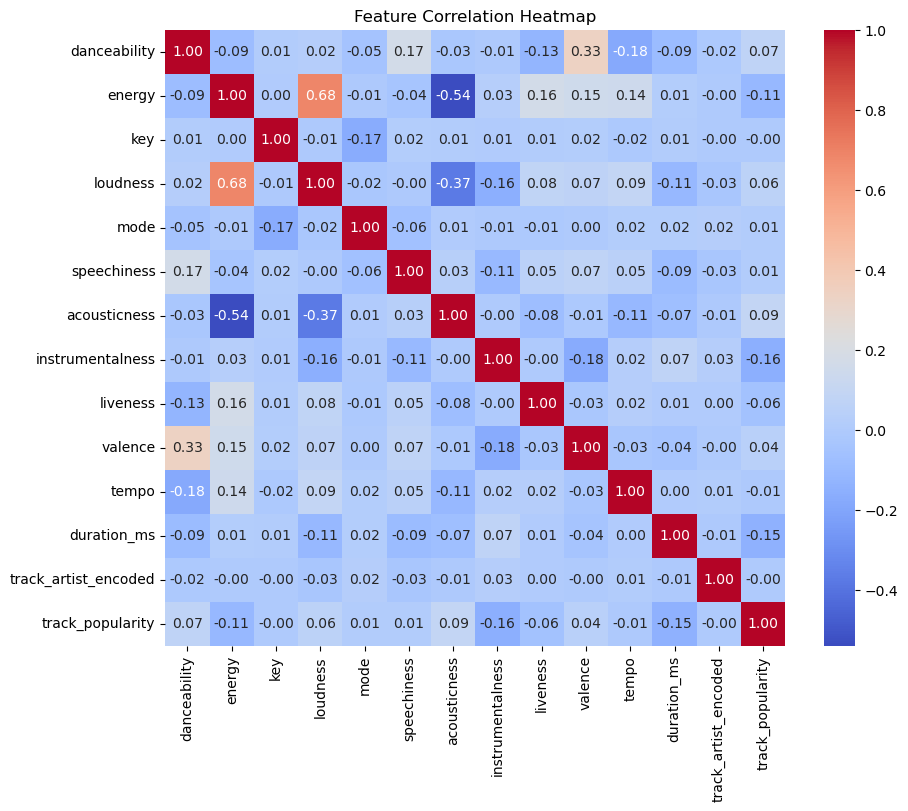

In [28]:
# Visualizing correlation with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

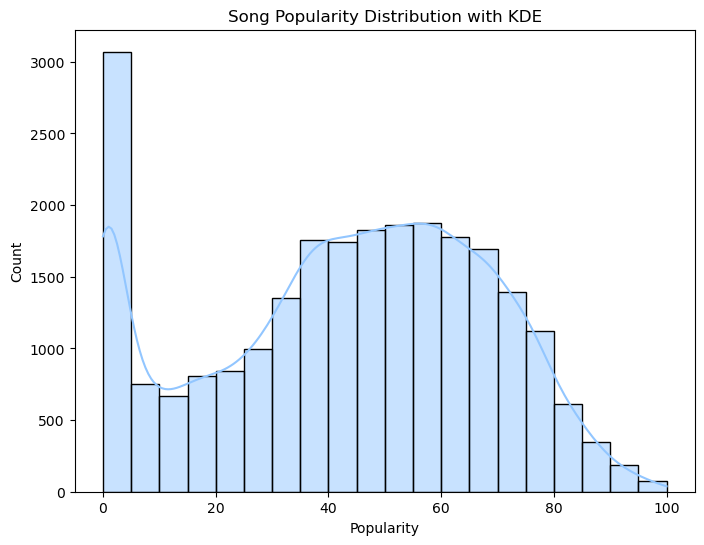

In [29]:
# song popularity histogram
plt.figure(figsize=(8, 6))
sns.histplot(train_df['track_popularity'], bins=20, kde=True)

# Add title and labels
plt.title('Song Popularity Distribution with KDE')
plt.xlabel('Popularity')

# Show the plot
plt.show()

In [30]:
from sklearn.utils import resample

# Define bins for undersampling (adjust according to your data distribution)
bins = [0, 20, 40, 60, 80, 100]  # Example: popularity ranges
train_df['popularity_bin'] = pd.cut(train_df['track_popularity'], bins=bins)

# Find the minimum sample size across bins
min_size = train_df['popularity_bin'].value_counts().min()

# Perform undersampling
undersampled_frames = [
    resample(group, replace=False, n_samples=min_size, random_state=42)
    for _, group in train_df.groupby('popularity_bin')
]
balanced_df = pd.concat(undersampled_frames).drop(columns=['popularity_bin'])


balanced_df.shape[0]

5465

In [31]:
def analyze_popularity_distribution(df):
    """
    Analyze the distribution of track popularity and suggest sampling strategies
    """
    # Calculate skewness
    skewness = df['track_popularity'].skew()
    
    # Create distribution plot
    plt.figure(figsize=(12, 6))
    
    # Histogram with KDE
    sns.histplot(data=df, x='track_popularity', kde=True)
    plt.title(f'Distribution of Track Popularity (Skewness: {skewness:.2f})')
    plt.xlabel('Track Popularity')
    plt.ylabel('Count')
    plt.show()
    
    # Calculate some statistical measures
    stats_dict = {
        'mean': df['track_popularity'].mean(),
        'median': df['track_popularity'].median(),
        'std': df['track_popularity'].std(),
        'skewness': skewness,
        'kurtosis': df['track_popularity'].kurtosis()
    }
    
    # Create popularity bins
    df['popularity_bin'] = pd.qcut(df['track_popularity'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    
    # Calculate bin distributions
    bin_distribution = df['popularity_bin'].value_counts().sort_index()
    
    return stats_dict, bin_distribution



def suggest_balanced_sampling_strategy(bin_distribution):
    """
    Suggest sampling strategy to balance the distribution without providing a fixed sample size.
    """
    # Decide target count per bin based on the maximum bin count (for upsampling) or minimum bin count (for downsampling)
    max_count = bin_distribution.max()  # Maximum count in any bin
    min_count = bin_distribution.min()  # Minimum count in any bin

    # Strategy: Either make all bins equal to the max count (upsample) or min count (downsample)
    sampling_strategy = {}
    for bin_name, count in bin_distribution.items():
        if count > min_count:
            sampling_strategy[bin_name] = ('downsample', min_count)
        else:
            sampling_strategy[bin_name] = ('upsample', max_count)
    
    return sampling_strategy


def apply_balanced_sampling_strategy(df, sampling_strategy):
    """
    Apply the suggested sampling strategy to balance the dataset automatically.
    """
    sampled_dfs = []
    
    for bin_name, (strategy, target_count) in sampling_strategy.items():
        bin_df = df[df['popularity_bin'] == bin_name]
        
        if strategy == 'downsample':
            sampled_df = bin_df.sample(n=target_count, random_state=42)
        else:  # upsample
            sampled_df = bin_df.sample(n=target_count, replace=True, random_state=42)
        
        sampled_dfs.append(sampled_df)
    
    return pd.concat(sampled_dfs, ignore_index=True)


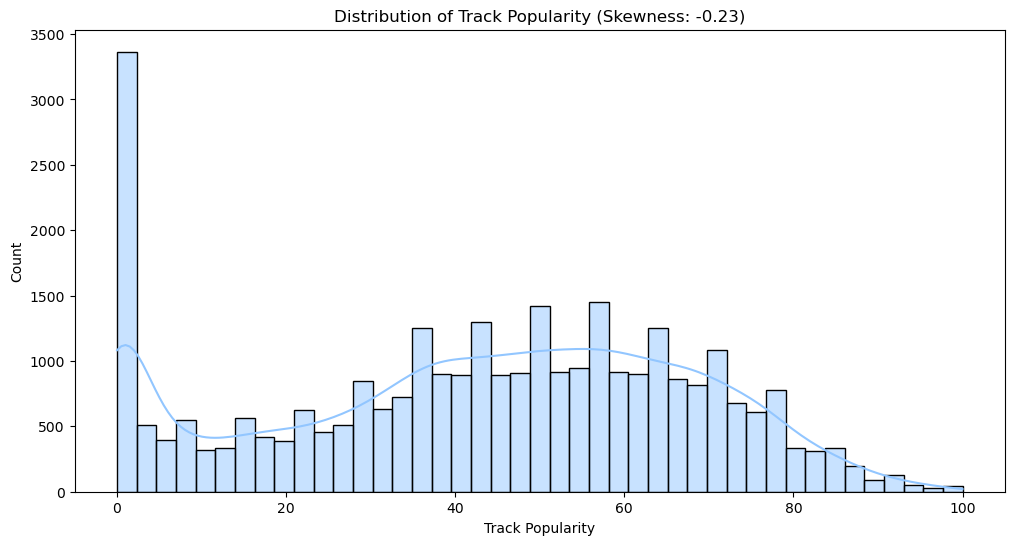


Original Distribution Statistics:
mean: 42.76
median: 45.00
std: 24.95
skewness: -0.23
kurtosis: -0.91

Bin Distribution:
popularity_bin
Very Low     6241
Low          6565
Medium       5885
High         6321
Very High    5930
Name: count, dtype: int64

After Sampling:


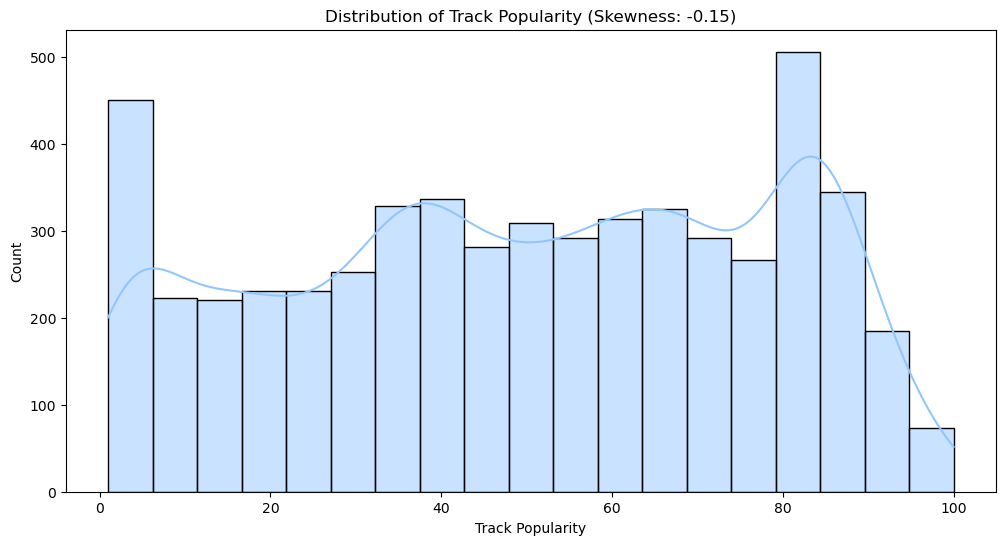

In [32]:
# Analyze original distribution
stats_dict, bin_distribution = analyze_popularity_distribution(df)
    
print("\nOriginal Distribution Statistics:")
for stat_name, value in stats_dict.items():
    print(f"{stat_name}: {value:.2f}")
    
print("\nBin Distribution:")
print(bin_distribution)
'''   
 Get sampling strategy
sampling_strategy = suggest_balanced_sampling_strategy(bin_distribution)
    
print("\nSuggested Sampling Strategy:")
for bin_name, (strategy, target_count) in sampling_strategy.items():
    print(f"{bin_name}: {strategy.title()} to {target_count} samples")
    
# Apply sampling strategy
balanced_df = apply_balanced_sampling_strategy(df, sampling_strategy)'''

    
# Show new distribution
print("\nAfter Sampling:")
_, new_bin_distribution = analyze_popularity_distribution(balanced_df)

In [33]:

balanced_df.drop(columns=['popularity_bin'], inplace=True)

y_train_balanced = balanced_df['track_popularity']

balanced_df.drop(columns=['track_popularity'], inplace=True)

X_train_balanced = balanced_df

In [34]:
from imblearn.over_sampling import SMOTE
# Now apply SMOTE to oversample the minority class on the training data
# Adjust k_neighbors if the minority class has fewer than 6 samples
smote = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)  # Reduced k_neighbors to 2
X_train_Oversampled,y_train_oversampled = smote.fit_resample(X_train_balanced, y_train_balanced)


# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", pd.Series(y_train_oversampled).value_counts())

# Now we have the oversampled training data (X_train_balanced, y_train_balanced)


Class distribution after SMOTE: track_popularity
15    153
69    153
73    153
72    153
61    153
     ... 
38    153
24    153
25    153
39    153
96    153
Name: count, Length: 100, dtype: int64


In [35]:
X_train_Oversampled.shape[0]

15300

In [36]:
X_train_Oversampled.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_artist_encoded
0,0.587,0.929,2,-4.783,1,0.0525,0.00411,0.767,0.184,0.123,124.053,160645,1363


In [37]:
train_df_avg = X_train_Oversampled.copy()
train_df_avg['track_popularity'] = y_train_oversampled

In [38]:
# Group the DataFrame by 'track_artist' and calculate the mean of 'track_popularity'
average_popularity_by_artist = train_df_avg.groupby('track_artist_encoded')['track_popularity'].mean()

# Display the result
print(average_popularity_by_artist)


track_artist_encoded
0        38.000
1        39.000
5        71.875
17       42.000
18       41.000
          ...  
10297    30.000
10298    19.000
10304     8.000
10305    14.000
10306    22.600
Name: track_popularity, Length: 6662, dtype: float64


In [39]:
test_df = X_test.copy()
test_df['track_popularity'] = y_test

# Baseline

In [40]:
# For artists in test set not seen in training, use overall training mean
overall_mean = train_df_avg['track_popularity'].mean()

# Create baseline predictions for test set
baseline_predictions = test_df['track_artist_encoded'].map(average_popularity_by_artist)
baseline_predictions = baseline_predictions.fillna(overall_mean)

# Calculate Mean Squared Error (MSE)
baseline_mse = mean_squared_error(test_df['track_popularity'], baseline_predictions)

# Calculate Mean Absolute Error (MAE)
baseline_mae = mean_absolute_error(test_df['track_popularity'], baseline_predictions)

# Calculate baseline RMSE
baseline_rmse = np.sqrt(mean_squared_error(test_df['track_popularity'], baseline_predictions))
print(f"Baseline RMSE: {baseline_rmse:.2f}")

# Print the MSE
print(f"Baseline MSE: {baseline_mse:.2f}")

# Print the MAE
print(f"Baseline MAE: {baseline_mae:.2f}")

Baseline RMSE: 26.94
Baseline MSE: 726.01
Baseline MAE: 20.66


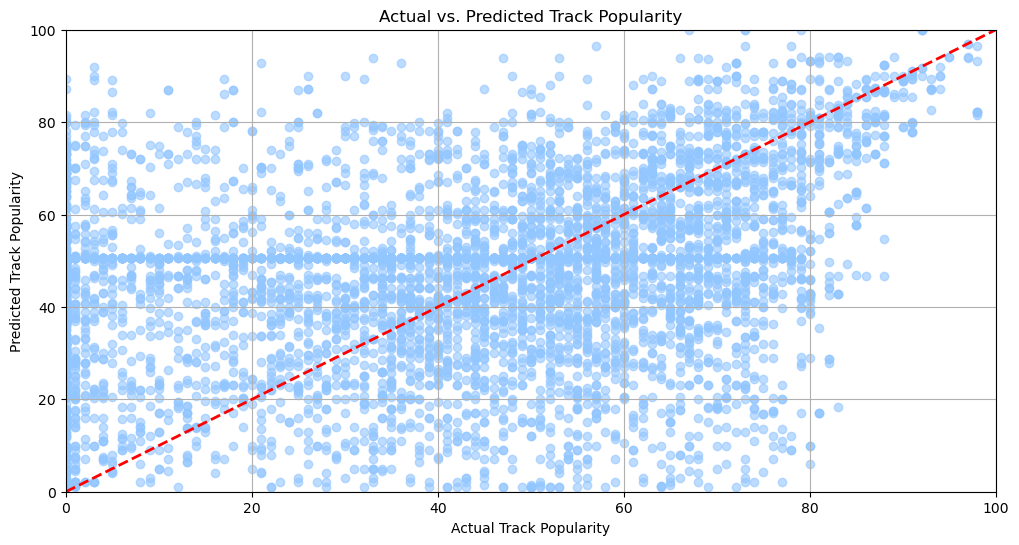

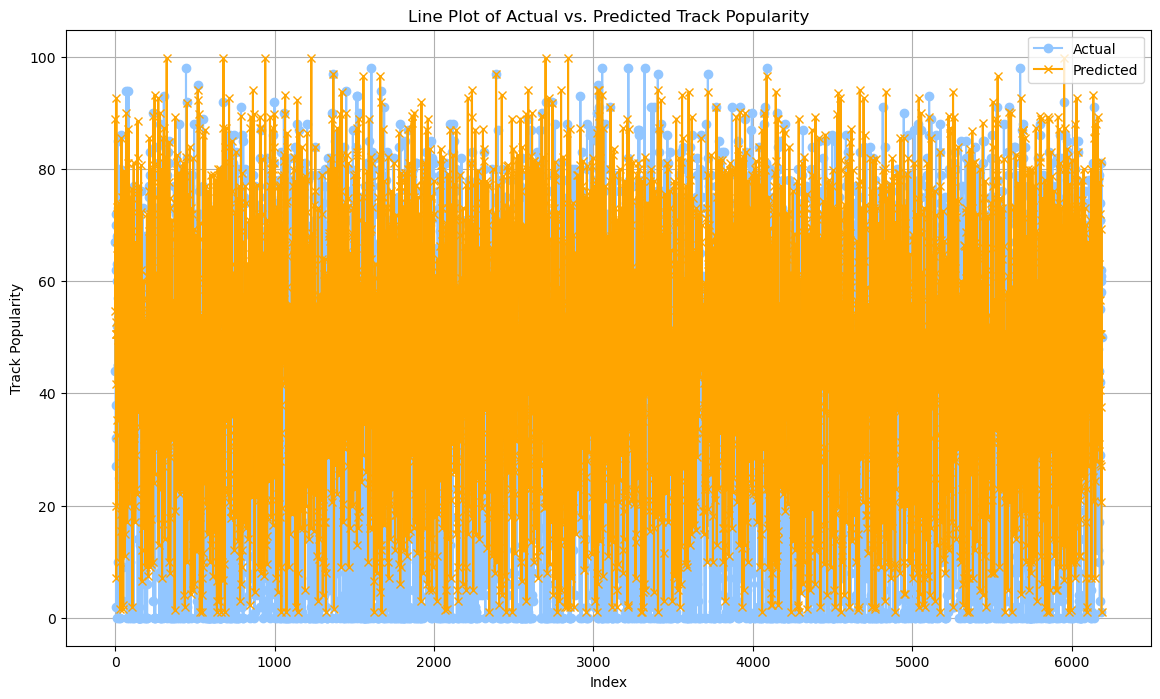

In [41]:
# Scatter Plot of Actual vs. Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(test_df['track_popularity'], baseline_predictions, alpha=0.6)
plt.plot([0, 100], [0, 100], '--r', linewidth=2)  # Diagonal line for reference
plt.title('Actual vs. Predicted Track Popularity')
plt.xlabel('Actual Track Popularity')
plt.ylabel('Predicted Track Popularity')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.grid(True)
plt.show()

# Line Plot of Actual vs. Predicted values
plt.figure(figsize=(14, 8))
plt.plot(test_df['track_popularity'].values, label='Actual', marker='o')
plt.plot(baseline_predictions.values, label='Predicted', color='orange', marker='x')
plt.title('Line Plot of Actual vs. Predicted Track Popularity')
plt.xlabel('Index')
plt.ylabel('Track Popularity')
plt.legend()
plt.grid(True)
plt.show()

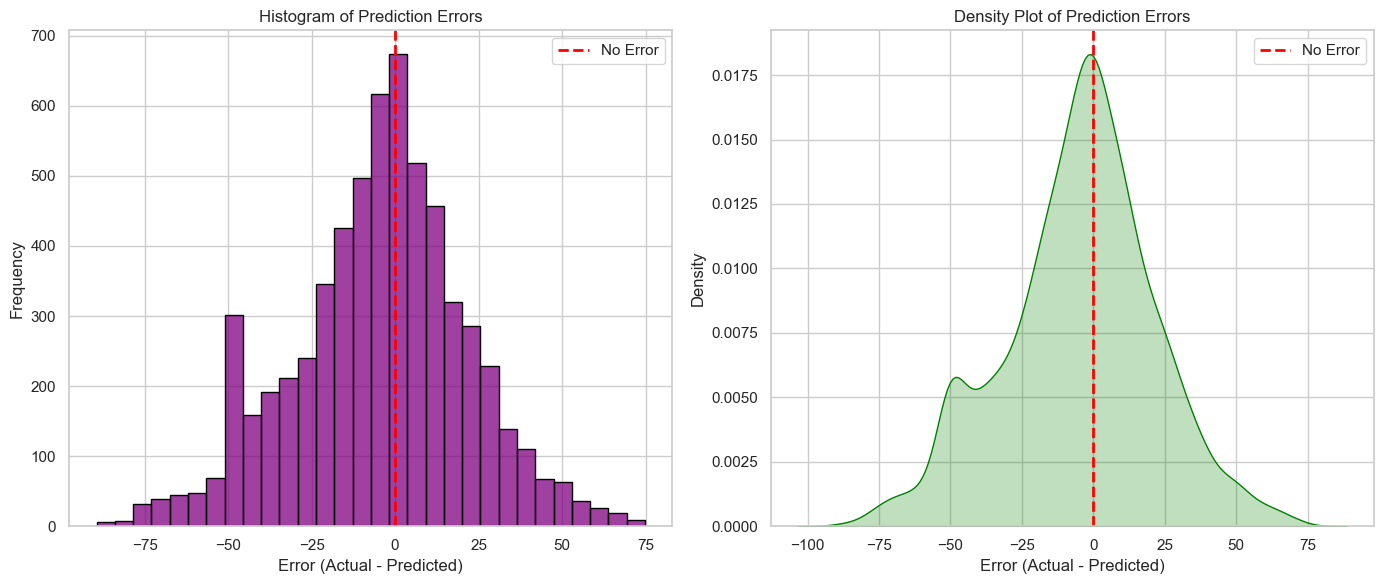

In [42]:
# Calculate prediction errors
errors = test_df['track_popularity'] - baseline_predictions

# Set plot style
sns.set(style="whitegrid")

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Histogram of Errors
plt.subplot(1, 2, 1)
sns.histplot(errors, bins=30, kde=False, color='purple', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No Error')
plt.title('Histogram of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.legend()

# Subplot 2: Density Plot of Errors
plt.subplot(1, 2, 2)
sns.kdeplot(errors, shade=True, color='green')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='No Error')
plt.title('Density Plot of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Density')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Linear Regression

In [43]:
X_train_Oversampled.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_artist_encoded
0,0.587,0.929,2,-4.783,1,0.0525,0.00411,0.767,0.184,0.123,124.053,160645,1363


In [44]:
X_test.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_artist_encoded
19578,0.821,0.789,11,-5.516,0,0.111,0.103,0.0,0.432,0.742,96.012,206947,9803


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_Oversampled)

# Use the same scaler to transform the test data (do not fit on the test data)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are standardized and ready to use for training the model


In [46]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_oversampled)

LinearRegression()

In [47]:
from sklearn.model_selection import KFold
#Setting up k-fold cross-validation on the training data alone
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation
# Performing cross-validation on the training set only
cv_mse_scores = cross_val_score(lr_model, X_train_scaled, y_train_oversampled, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)
# Perform cross-validation and calculate MAE for each fold
cv_mae_scores = cross_val_score(lr_model, X_train_scaled, y_train_oversampled, cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)


lr_cv_rmse = np.sqrt(-cv_mse_scores)  # Convert negative MSE to RMSE
lr_cv_mse = cv_mse_scores
lr_cv_mae = -cv_mae_scores 


# Print RMSE, MSE, and MAE for each fold
print("Cross-Validation RMSE for each fold:", lr_cv_rmse)
print("Cross-Validation MSE for each fold:", -lr_cv_mse)  # MSE is negative, so negate it
print("Cross-Validation MAE for each fold:", lr_cv_mae)

# Calculate mean RMSE, MSE, and MAE across all folds
mean_rmse = lr_cv_rmse.mean()
mean_mse = -lr_cv_mse.mean()  # Negate to get positive MSE
mean_mae = lr_cv_mae.mean()

# Displaying the mean RMSE, MSE, and MAE
print(f"Mean RMSE: {mean_rmse:.2f}")
print(f"Mean MSE: {mean_mse:.2f}")
print(f"Mean MAE: {mean_mae:.2f}")

Cross-Validation RMSE for each fold: [25.91015539 26.19617562 26.20506743 26.19842227 26.03777477 26.93594181
 26.05579951 26.14531066 26.0157218  26.49373229]
Cross-Validation MSE for each fold: [671.33615253 686.23961732 686.70555891 686.35732941 677.96571485
 725.54496096 678.90468807 683.57726959 676.81778083 701.91785082]
Cross-Validation MAE for each fold: [21.85254506 22.08556354 22.07819126 22.32234981 21.86755965 22.89335013
 21.98966993 22.12935295 22.1468792  22.49780163]
Mean RMSE: 26.22
Mean MSE: 687.54
Mean MAE: 22.19


In [48]:
# Make predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

In [49]:

# Calculate metrics
lr_train_rmse = np.sqrt(mean_squared_error(y_train_oversampled, lr_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))

lr_train_mse = (mean_squared_error(y_train_oversampled, lr_train_pred))
lr_test_mse =  (mean_squared_error(y_test, lr_test_pred))

lr_train_mae = (mean_absolute_error(y_train_oversampled, lr_train_pred))
lr_test_mae =  (mean_absolute_error(y_test, lr_test_pred))
lr_improvement = ((baseline_rmse - lr_test_rmse) / baseline_rmse) * 100

print("Linear Regression Results:")
print(f"Train RMSE: {lr_train_rmse:.2f}")
print(f"Test RMSE: {lr_test_rmse:.2f}")
print(f"Train MSE: {lr_train_mse:.2f}")
print(f"Test MSE: {lr_test_mse:.2f}")
print(f"Train MAE: {lr_train_mae:.2f}")
print(f"Test MAE: {lr_test_mae:.2f}")
print(f"Improvement over baseline: {lr_improvement:.1f}%")

Linear Regression Results:
Train RMSE: 26.20
Test RMSE: 25.93
Train MSE: 686.34
Test MSE: 672.24
Train MAE: 22.17
Test MAE: 20.62
Improvement over baseline: 3.8%


# Feature Trailing

In [50]:
#Using Heatmate, We have understood that the columns Acousticness, Loudness are either highly negatively or positively correlated to Energy feature. 
#So, we have dropped those 2 features and tried to test the model

In [51]:
from math import sqrt
# Function to train and evaluate models
def evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        "Linear Regression": LinearRegression()
        # "LightGBM": LGBMRegressor(random_state=42)
    }
    results_rmse= {}
    results_mse = {}
    results_mae = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        results_rmse[model_name] = {"RMSE": rmse}
        mse = (mean_squared_error(y_test, y_pred))
        results_mse[model_name] = {"MSE": mse}
        mae = (mean_absolute_error(y_test, y_pred))
        results_mae[model_name] = {"MAE": mae}
    return results_rmse,results_mse,results_mae

In [52]:
# Drop irrelevant non-numeric columns
X_train_balanced = X_train_Oversampled.drop(columns=['loudness','acousticness'], errors='ignore')
X_test_balanced = X_test.drop(columns=['loudness','acousticness'], errors='ignore')

In [53]:
# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_balanced)

# Use the same scaler to transform the test data (do not fit on the test data)
X_test_scaled = scaler.transform(X_test_balanced)

In [54]:
# Evaluate models with the original features (including acousticness and loudness)
results_rmse,results_mse,results_mae = evaluate_models(X_train_scaled, y_train_oversampled, X_test_scaled, y_test)
print("Results Before Dropping Columns:")
print(results_rmse,results_mse,results_mae)

Results Before Dropping Columns:
{'Linear Regression': {'RMSE': 26.083567964578815}} {'Linear Regression': {'MSE': 680.3525177628022}} {'Linear Regression': {'MAE': 20.980167808233393}}


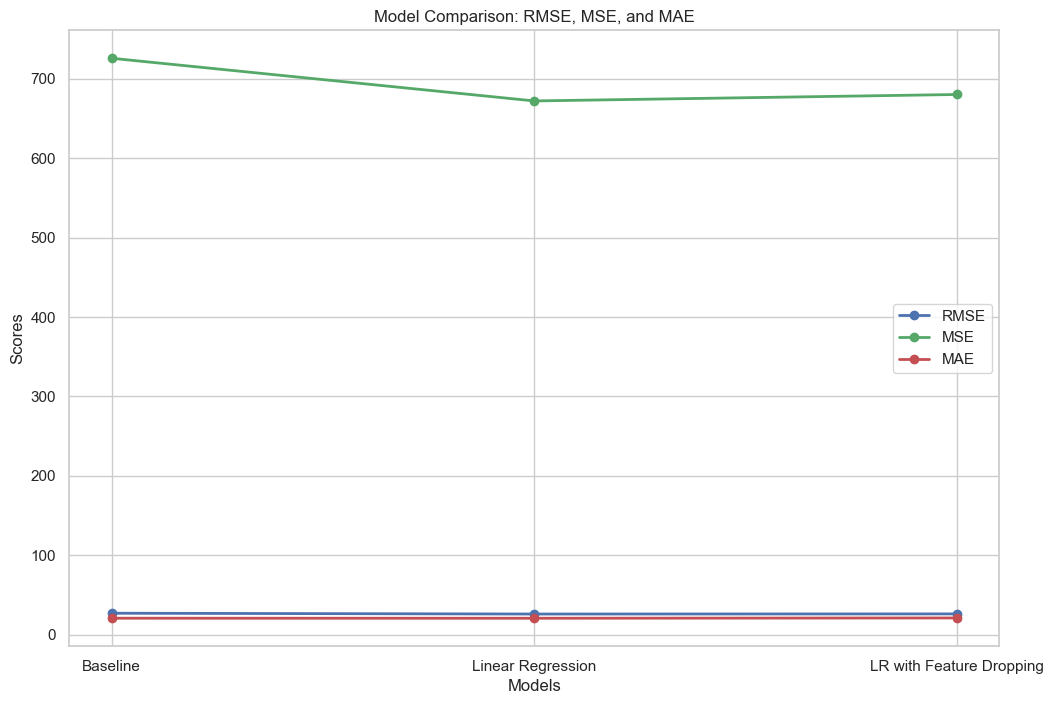

In [55]:
# Metrics for Linear Regression
lr_rmse = lr_test_rmse 
lr_mse = lr_test_mse   
lr_mae = lr_test_mae   

# Metrics for Linear Regression (Feature Dropping)
lr_fd_rmse = results_rmse['Linear Regression']['RMSE']
lr_fd_mse = results_mse['Linear Regression']['MSE']
lr_fd_mae = results_mae['Linear Regression']['MAE']

# Prepare data for plotting
models = ['Baseline', 'Linear Regression', 'LR with Feature Dropping']
rmse_values = [baseline_rmse, lr_rmse, lr_fd_rmse]
mse_values = [baseline_mse, lr_mse, lr_fd_mse]
mae_values = [baseline_mae, lr_mae, lr_fd_mae]

# Plot the scores
plt.figure(figsize=(12, 8))

# Plot RMSE
plt.plot(models, rmse_values, marker='o', label='RMSE', linestyle='-', color='b', linewidth=2)

# Plot MSE
plt.plot(models, mse_values, marker='o', label='MSE', linestyle='-', color='g', linewidth=2)

# Plot MAE
plt.plot(models, mae_values, marker='o', label='MAE', linestyle='-', color='r', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: RMSE, MSE, and MAE')
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10)  # you can tune max_depth

dt_model.fit(X_train_Oversampled, y_train_oversampled)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [57]:
#Performing cross-validation on the training set only
dt_cv_scores = cross_val_score(dt_model, X_train_Oversampled, y_train_oversampled, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)

dt_cv_mse = dt_cv_scores
dt_cv_mae = cross_val_score(dt_model, X_train_Oversampled, y_train_oversampled, cv=kf, scoring='neg_mean_absolute_error',n_jobs=-1)



dt_cv_rmse = np.sqrt(-dt_cv_scores)  # Convert negative MSE to RMSE
dt_cv_mse = dt_cv_mse
dt_cv_mae = -dt_cv_mae


# Print RMSE, MSE, and MAE for each fold
print("Cross-Validation RMSE for each fold:", dt_cv_rmse)
print("Cross-Validation MSE for each fold:", -dt_cv_mse)  # MSE is negative, so negate it
print("Cross-Validation MAE for each fold:", dt_cv_mae)

# Calculate mean RMSE, MSE, and MAE across all folds
dt_cv_mean_rmse = dt_cv_rmse.mean()
dt_cv_mean_mse = -dt_cv_mse.mean()  # Negate to get positive MSE
dt_cv_mean_mae = dt_cv_mae.mean()

# Displaying the mean RMSE, MSE, and MAE
print(f"Mean RMSE: {dt_cv_mean_rmse:.2f}")
print(f"Mean MSE: {dt_cv_mean_mse:.2f}")
print(f"Mean MAE: {dt_cv_mean_mae:.2f}")

Cross-Validation RMSE for each fold: [21.44055067 22.11879691 22.40015921 21.67238936 22.08707689 22.15204141
 21.7817659  21.43054457 22.37341172 21.12432933]
Cross-Validation MSE for each fold: [459.69721309 489.2411767  501.76713246 469.69246049 487.83896536
 490.71293881 474.44532579 459.26824044 500.56955193 446.23728982]
Cross-Validation MAE for each fold: [16.1442982  16.67811242 16.99124563 16.58086514 16.51459749 16.71669794
 16.52637379 16.23292628 16.98289716 16.3260588 ]
Mean RMSE: 21.86
Mean MSE: 477.95
Mean MAE: 16.57


In [58]:


# Make predictions
dt_train_pred = dt_model.predict(X_train_Oversampled)
dt_test_pred = dt_model.predict(X_test)

# Calculate metrics
dt_train_rmse = np.sqrt(mean_squared_error(y_train_oversampled, dt_train_pred))
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))

dt_train_mse = (mean_squared_error(y_train_oversampled, dt_train_pred))
dt_test_mse =  (mean_squared_error(y_test, dt_test_pred))

dt_train_mae = (mean_absolute_error(y_train_oversampled, dt_train_pred))
dt_test_mae =  (mean_absolute_error(y_test, dt_test_pred))

dt_improvement = ((dt_test_rmse - baseline_rmse) / dt_test_rmse) * 100

print("Decision Tree Model Results:")
print(f"Train RMSE: {dt_train_rmse:.2f}")
print(f"Test RMSE: {dt_test_rmse:.2f}")
print(f"Train MSE: {dt_train_mse:.2f}")
print(f"Test MSE: {dt_test_mse:.2f}")
print(f"Train MAE: {dt_train_mae:.2f}")
print(f"Test MAE: {dt_test_mae:.2f}")

print(f"Improvement over baseline: {dt_improvement:.1f}%")





Decision Tree Model Results:
Train RMSE: 18.48
Test RMSE: 27.89
Train MSE: 341.47
Test MSE: 778.12
Train MAE: 13.97
Test MAE: 22.29
Improvement over baseline: 3.4%


In [59]:
# Feature trail & Error to see which features can contribute more to better model performance

In [60]:
# Train Decision Tree
fdt_model = DecisionTreeRegressor(random_state=42, max_depth=10)  # you can tune max_depth

fdt_model.fit(X_train_balanced, y_train_oversampled)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [61]:
print("After removing the columns Acousticness & Loudness:")
#Performing cross-validation on the training set only
fdt_cv_scores = cross_val_score(fdt_model, X_train_balanced, y_train_oversampled, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)

fdt_cv_mse = dt_cv_scores
fdt_cv_mae = cross_val_score(fdt_model, X_train_balanced, y_train_oversampled, cv=kf, scoring='neg_mean_absolute_error',n_jobs=-1)



fdt_cv_rmse = np.sqrt(-fdt_cv_scores)  # Convert negative MSE to RMSE
fdt_cv_mse = fdt_cv_mse
fdt_cv_mae = -fdt_cv_mae


# Print RMSE, MSE, and MAE for each fold
print("Cross-Validation RMSE for each fold:", fdt_cv_rmse)
print("Cross-Validation MSE for each fold:", -fdt_cv_mse)  # MSE is negative, so negate it
print("Cross-Validation MAE for each fold:", fdt_cv_mae)

# Calculate mean RMSE, MSE, and MAE across all folds
fdt_cv_mean_rmse = fdt_cv_rmse.mean()
fdt_cv_mean_mse = -fdt_cv_mse.mean()  # Negate to get positive MSE
fdt_cv_mean_mae = fdt_cv_mae.mean()

# Displaying the mean RMSE, MSE, and MAE
print(f"Mean RMSE: {fdt_cv_mean_rmse:.2f}")
print(f"Mean MSE: {fdt_cv_mean_mse:.2f}")
print(f"Mean MAE: {fdt_cv_mean_mae:.2f}")

After removing the columns Acousticness & Loudness:
Cross-Validation RMSE for each fold: [22.13527278 21.87095613 22.69384033 21.73997978 21.99692436 22.34266898
 21.75241007 21.57889796 21.91631972 22.29011225]
Cross-Validation MSE for each fold: [459.69721309 489.2411767  501.76713246 469.69246049 487.83896536
 490.71293881 474.44532579 459.26824044 500.56955193 446.23728982]
Cross-Validation MAE for each fold: [16.95323121 16.6910212  17.58332538 16.91995326 16.62456063 17.14955371
 16.6481419  16.28056824 16.74944474 17.16050782]
Mean RMSE: 22.03
Mean MSE: 477.95
Mean MAE: 16.88


In [62]:
X_train_balanced.head(1)

,danceability,energy,key,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,track_artist_encoded
0,0.587,0.929,2,1,0.0525,0.767,0.184,0.123,124.053,160645,1363


In [63]:
X_test.head(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_artist_encoded
19578,0.821,0.789,11,-5.516,0,0.111,0.1030,0.0,0.432,0.742,96.012,206947,9803
30663,0.641,0.732,2,-5.324,1,0.051,0.0992,0.0,0.285,0.352,82.027,236013,5320


In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define your model
model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [2, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Use RMSE as the evaluation metric
    cv=10,  # Number of folds in k-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model to the data
grid_search.fit(X_train_Oversampled, y_train_oversampled)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print results
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation RMSE:", -grid_search.best_score_)

# Evaluate the best model on test data
y_pred = best_model.predict(X_test)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation RMSE: 25.122447544672166


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Predict on the test data
y_pred = best_model.predict(X_test)

# Evaluate performance
dt_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
dt_test_mae = mean_absolute_error(y_test, y_pred)
dt_test_mse = mean_squared_error(y_test, y_pred)

print(f"Test RMSE: {dt_test_rmse}")
print(f"Test MAE: {dt_test_mae}")
print(f"Test MSE: {dt_test_mse}")

Test RMSE: 30.1173078526628
Test MAE: 23.699940972122135
Test MSE: 907.0522322920643


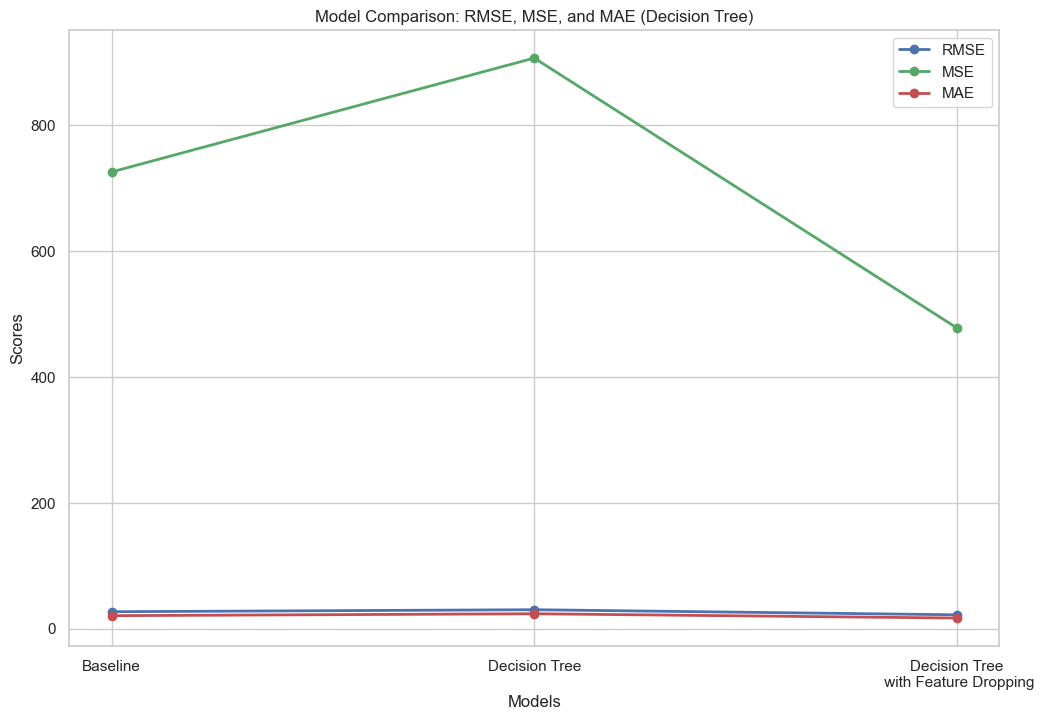

In [66]:
# Metrics for Decision Tree
dt_rmse = dt_test_rmse
dt_mse = dt_test_mse
dt_mae = dt_test_mae

# Metrics for Decision Tree (Feature Dropping)
dt_fd_rmse = fdt_cv_mean_rmse
dt_fd_mse = fdt_cv_mean_mse
dt_fd_mae = fdt_cv_mean_mae

# Prepare data for plotting
models = ['Baseline', 'Decision Tree', 'Decision Tree\n with Feature Dropping']
rmse_values = [baseline_rmse, dt_rmse, dt_fd_rmse]
mse_values = [baseline_mse, dt_mse, dt_fd_mse]
mae_values = [baseline_mae, dt_mae, dt_fd_mae]

# Plot the scores
plt.figure(figsize=(12, 8))

# Plot RMSE
plt.plot(models, rmse_values, marker='o', label='RMSE', linestyle='-', color='b', linewidth=2)

# Plot MSE
plt.plot(models, mse_values, marker='o', label='MSE', linestyle='-', color='g', linewidth=2)

# Plot MAE
plt.plot(models, mae_values, marker='o', label='MAE', linestyle='-', color='r', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: RMSE, MSE, and MAE (Decision Tree)')
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


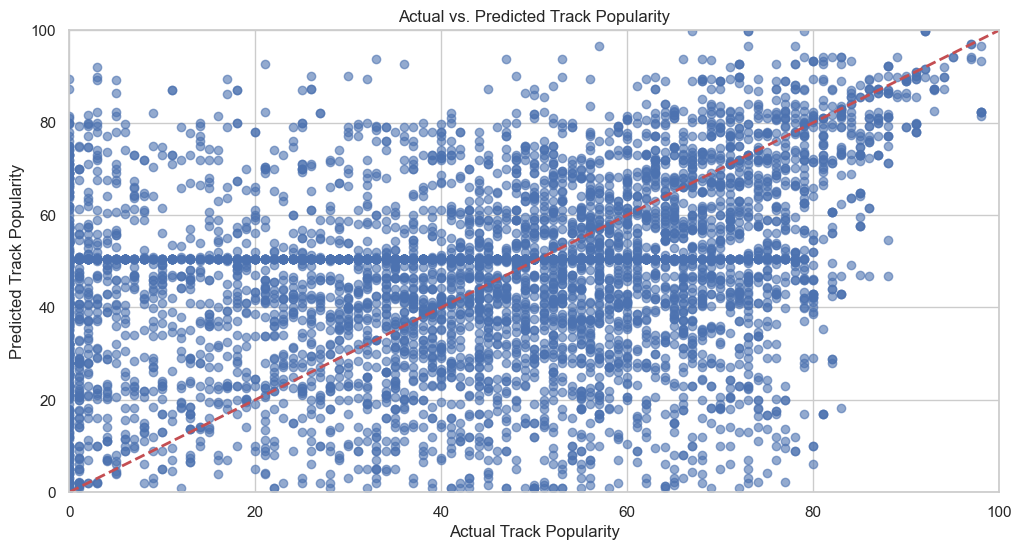

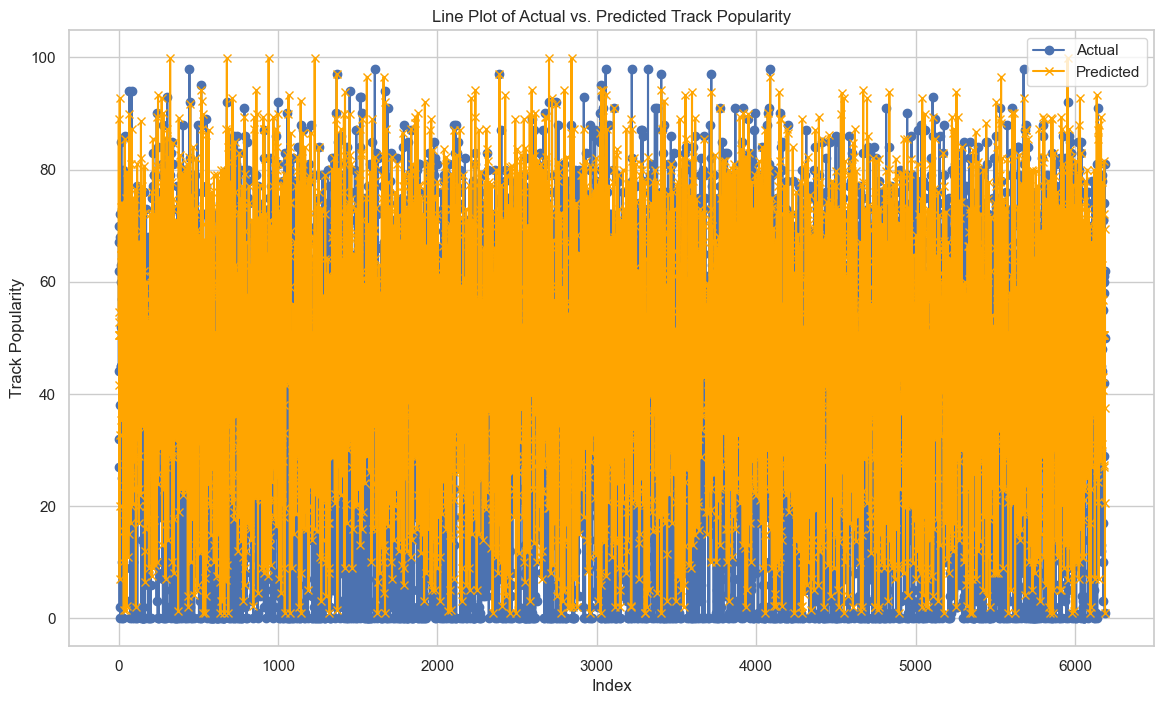

In [104]:
# Scatter Plot of Actual vs. Predicted values
plt.figure(figsize=(12, 6))
plt.scatter(test_df['track_popularity'], baseline_predictions, alpha=0.6)
plt.plot([0, 100], [0, 100], '--r', linewidth=2)  # Diagonal line for reference
plt.title('Actual vs. Predicted Track Popularity')
plt.xlabel('Actual Track Popularity')
plt.ylabel('Predicted Track Popularity')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.grid(True)
plt.show()

# Line Plot of Actual vs. Predicted values
plt.figure(figsize=(14, 8))
plt.plot(test_df['track_popularity'].values, label='Actual', marker='o')
plt.plot(baseline_predictions.values, label='Predicted', color='orange', marker='x')
plt.title('Line Plot of Actual vs. Predicted Track Popularity')
plt.xlabel('Index')
plt.ylabel('Track Popularity')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest

In [67]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_Oversampled, y_train_oversampled)

RandomForestRegressor(random_state=42)

In [68]:
#Performing cross-validation on the training set only
rf_cv_scores = cross_val_score(rf_model, X_train_Oversampled, y_train_oversampled, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)

rf_cv_mse = rf_cv_scores
rf_cv_mae = cross_val_score(rf_model, X_train_Oversampled, y_train_oversampled, cv=kf, scoring='neg_mean_absolute_error',n_jobs=-1)



rf_cv_rmse = np.sqrt(-rf_cv_scores)  # Convert negative MSE to RMSE
rf_cv_mse = rf_cv_mse
rf_cv_mae = -rf_cv_mae


# Print RMSE, MSE, and MAE for each fold
print("Cross-Validation RMSE for each fold:", rf_cv_rmse)
print("Cross-Validation MSE for each fold:", -rf_cv_mse)  # MSE is negative, so negate it
print("Cross-Validation MAE for each fold:", rf_cv_mae)

# Calculate mean RMSE, MSE, and MAE across all folds
rf_cv_mean_rmse = rf_cv_rmse.mean()
rf_cv_mean_mse = -rf_cv_mse.mean()  # Negate to get positive MSE
rf_cv_mean_mae = rf_cv_mae.mean()

# Displaying the mean RMSE, MSE, and MAE
print(f"Mean RMSE: {rf_cv_mean_rmse:.2f}")
print(f"Mean MSE: {rf_cv_mean_mse:.2f}")
print(f"Mean MAE: {rf_cv_mean_mae:.2f}")

Cross-Validation RMSE for each fold: [15.34758706 15.18358996 15.07286749 15.24314347 15.26649896 15.33564409
 15.1641441  14.84116842 15.22009622 15.00498985]
Cross-Validation MSE for each fold: [235.5484285  230.54140403 227.19133429 232.35342289 233.06599052
 235.18197974 229.95126626 220.26028    231.65132882 225.14972047]
Cross-Validation MAE for each fold: [10.6248616  10.40777372 10.3357924  10.22116535 10.21421918 10.50841958
 10.41108739 10.04050702 10.43656812 10.42590527]
Mean RMSE: 15.17
Mean MSE: 230.09
Mean MAE: 10.36


In [69]:
# Make predictions
rf_train_pred = rf_model.predict(X_train_Oversampled)
rf_test_pred = rf_model.predict(X_test)

# Calculate metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train_oversampled, dt_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))

rf_train_mse = (mean_squared_error(y_train_oversampled, dt_train_pred))
rf_test_mse =  (mean_squared_error(y_test, dt_test_pred))

rf_train_mae = (mean_absolute_error(y_train_oversampled, dt_train_pred))
rf_test_mae =  (mean_absolute_error(y_test, dt_test_pred))

rf_improvement = ((rf_test_rmse - baseline_rmse) / rf_test_rmse) * 100

print("Random Forest Model Results:")
print(f"Train RMSE: {rf_train_rmse:.2f}")
print(f"Test RMSE: {rf_test_rmse:.2f}")
print(f"Train MSE: {rf_train_mse:.2f}")
print(f"Test MSE: {rf_test_mse:.2f}")
print(f"Train MAE: {rf_train_mae:.2f}")
print(f"Test MAE: {rf_test_mae:.2f}")

print(f"Improvement over baseline: {rf_improvement:.1f}%")


Random Forest Model Results:
Train RMSE: 18.48
Test RMSE: 27.89
Train MSE: 341.47
Test MSE: 778.12
Train MAE: 13.97
Test MAE: 22.29
Improvement over baseline: 3.4%


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the range of n_estimators to test
n_estimators_range = [100, 200, 300]

# Store cross-validation scores
cv_scores = []

for n in n_estimators_range:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(rf_model, X_train_Oversampled, y_train_oversampled, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(-np.mean(scores))  # Store the mean MSE across folds

# Print results
for n, score in zip(n_estimators_range, cv_scores):
    print(f"n_estimators: {n}, Mean CV MSE: {score}")


n_estimators: 100, Mean CV MSE: 415.09690337899235
n_estimators: 200, Mean CV MSE: 412.95976088773705
n_estimators: 300, Mean CV MSE: 412.94217367921385


In [71]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train_Oversampled, y_train_oversampled)

RandomForestRegressor(n_estimators=300, random_state=42)

In [72]:
print('After hyper-parameter tuning:')
# Make predictions
rf_train_pred = rf_model.predict(X_train_Oversampled)
rf_test_pred = rf_model.predict(X_test)

# Calculate metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train_oversampled, dt_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))

rf_train_mse = (mean_squared_error(y_train_oversampled, dt_train_pred))
rf_test_mse =  (mean_squared_error(y_test, dt_test_pred))

rf_train_mae = (mean_absolute_error(y_train_oversampled, dt_train_pred))
rf_test_mae =  (mean_absolute_error(y_test, dt_test_pred))

rf_improvement = ((rf_test_rmse - baseline_rmse) / rf_test_rmse) * 100

print("Random Forest Model Results:")
print(f"Train RMSE: {rf_train_rmse:.2f}")
print(f"Test RMSE: {rf_test_rmse:.2f}")
print(f"Train MSE: {rf_train_mse:.2f}")
print(f"Test MSE: {rf_test_mse:.2f}")
print(f"Train MAE: {rf_train_mae:.2f}")
print(f"Test MAE: {rf_test_mae:.2f}")

print(f"Improvement over baseline: {rf_improvement:.1f}%")

After hyper-parameter tuning:
Random Forest Model Results:
Train RMSE: 18.48
Test RMSE: 27.89
Train MSE: 341.47
Test MSE: 778.12
Train MAE: 13.97
Test MAE: 22.29
Improvement over baseline: 3.4%


In [73]:
# Features Trail & Error. After removing the Acousticness & Loudness

In [74]:
# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train_balanced, y_train_oversampled)

RandomForestRegressor(n_estimators=300, random_state=42)

In [75]:
#Performing cross-validation on the training set only
frf_cv_scores = cross_val_score(rf_model, X_train_balanced, y_train_oversampled, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)

frf_cv_mse = frf_cv_scores
frf_cv_mae = cross_val_score(rf_model, X_train_balanced, y_train_oversampled, cv=kf, scoring='neg_mean_absolute_error',n_jobs=-1)



frf_cv_rmse = np.sqrt(-frf_cv_scores)  # Convert negative MSE to RMSE
frf_cv_mse = frf_cv_mse
frf_cv_mae = -frf_cv_mae


# Print RMSE, MSE, and MAE for each fold
print("Cross-Validation RMSE for each fold:", frf_cv_rmse)
print("Cross-Validation MSE for each fold:", -frf_cv_mse)  # MSE is negative, so negate it
print("Cross-Validation MAE for each fold:", frf_cv_mae)

# Calculate mean RMSE, MSE, and MAE across all folds
frf_cv_mean_rmse = frf_cv_rmse.mean()
frf_cv_mean_mse = -frf_cv_mse.mean()  # Negate to get positive MSE
frf_cv_mean_mae = frf_cv_mae.mean()

# Displaying the mean RMSE, MSE, and MAE
print(f"Mean RMSE: {frf_cv_mean_rmse:.2f}")
print(f"Mean MSE: {frf_cv_mean_mse:.2f}")
print(f"Mean MAE: {frf_cv_mean_mae:.2f}")

Cross-Validation RMSE for each fold: [15.3684272  15.37994244 15.08593004 15.08871113 15.14258689 15.53984553
 15.08820286 15.08444416 15.17955237 15.00320596]
Cross-Validation MSE for each fold: [236.18855455 236.54262951 227.5852852  227.66920371 229.29793782
 241.48679907 227.65386561 227.54045555 230.41881007 225.09618911]
Cross-Validation MAE for each fold: [10.72490823 10.49168879 10.33214874 10.19861054 10.20888018 10.75294815
 10.3560567  10.1900538  10.51221087 10.45239104]
Mean RMSE: 15.20
Mean MSE: 230.95
Mean MAE: 10.42


In [103]:
print('After Feature changes :')
# Make predictions
frf_train_pred = rf_model.predict(X_train_balanced)
frf_test_pred = rf_model.predict(X_test_balanced)

# Calculate metrics
frf_train_rmse = np.sqrt(mean_squared_error(y_train_oversampled, frf_train_pred))
frf_test_rmse = np.sqrt(mean_squared_error(y_test, frf_test_pred))

frf_train_mse = (mean_squared_error(y_train_oversampled, frf_train_pred))
frf_test_mse =  (mean_squared_error(y_test, frf_test_pred))

frf_train_mae = (mean_absolute_error(y_train_oversampled, frf_train_pred))
frf_test_mae =  (mean_absolute_error(y_test, frf_test_pred))

frf_improvement = ((frf_test_rmse - baseline_rmse) / frf_test_rmse) * 100

print("Random Forest Model Results:")
print(f"Train RMSE: {frf_train_rmse:.2f}")
print(f"Test RMSE: {frf_test_rmse:.2f}")
print(f"Train MSE: {frf_train_mse:.2f}")
print(f"Test MSE: {frf_test_mse:.2f}")
print(f"Train MAE: {frf_train_mae:.2f}")
print(f"Test MAE: {frf_test_mae:.2f}")

print(f"Improvement over baseline: {frf_improvement:.1f}%")

After Feature changes :
Random Forest Model Results:
Train RMSE: 5.78
Test RMSE: 23.58
Train MSE: 33.39
Test MSE: 555.88
Train MAE: 3.82
Test MAE: 18.76
Improvement over baseline: -14.3%


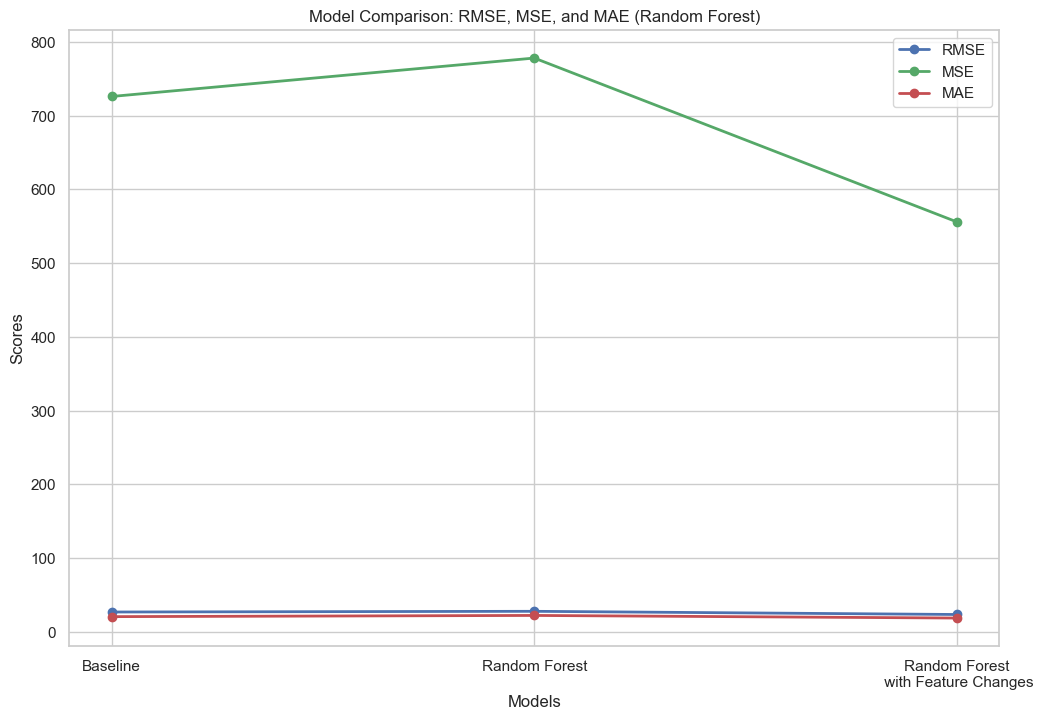

In [77]:
# Metrics for Random Forest
rf_rmse = rf_test_rmse
rf_mse = rf_test_mse
rf_mae = rf_test_mae

# Metrics for Random Forest (Feature Changes)
rf_fc_rmse = frf_test_rmse
rf_fc_mse = frf_test_mse
rf_fc_mae = frf_test_mae

# Prepare data for plotting
models_rf = ['Baseline', 'Random Forest', 'Random Forest\n with Feature Changes']
rmse_values_rf = [baseline_rmse, rf_rmse, rf_fc_rmse]
mse_values_rf = [baseline_mse, rf_mse, rf_fc_mse]
mae_values_rf = [baseline_mae, rf_mae, rf_fc_mae]

# Plot the scores
plt.figure(figsize=(12, 8))

# Plot RMSE
plt.plot(models_rf, rmse_values_rf, marker='o', label='RMSE', linestyle='-', color='b', linewidth=2)

# Plot MSE
plt.plot(models_rf, mse_values_rf, marker='o', label='MSE', linestyle='-', color='g', linewidth=2)

# Plot MAE
plt.plot(models_rf, mae_values_rf, marker='o', label='MAE', linestyle='-', color='r', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: RMSE, MSE, and MAE (Random Forest)')
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


# XGBoost

In [78]:
from xgboost import XGBRegressor
import xgboost as xgb
# Train XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_Oversampled, y_train_oversampled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [79]:
#Performing cross-validation on the training set only
xgb_cv_scores = cross_val_score(xgb_model, X_train_Oversampled, y_train_oversampled, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)

xgb_cv_mse = xgb_cv_scores
xgb_cv_mae = cross_val_score(xgb_model, X_train_Oversampled, y_train_oversampled, cv=kf, scoring='neg_mean_absolute_error',n_jobs=-1)



xgb_cv_rmse = np.sqrt(-xgb_cv_scores)  # Convert negative MSE to RMSE
xgb_cv_mse = xgb_cv_mse
xgb_cv_mae = -xgb_cv_mae


# Print RMSE, MSE, and MAE for each fold
print("Cross-Validation RMSE for each fold:", xgb_cv_rmse)
print("Cross-Validation MSE for each fold:", -xgb_cv_mse)  # MSE is negative, so negate it
print("Cross-Validation MAE for each fold:", xgb_cv_mae)

# Calculate mean RMSE, MSE, and MAE across all folds
xgb_cv_mean_rmse = xgb_cv_rmse.mean()
xgb_cv_mean_mse = -xgb_cv_mse.mean()  # Negate to get positive MSE
xgb_cv_mean_mae = xgb_cv_mae.mean()

# Displaying the mean RMSE, MSE, and MAE
print(f"Mean RMSE: {xgb_cv_mean_rmse:.2f}")
print(f"Mean MSE: {xgb_cv_mean_mse:.2f}")
print(f"Mean MAE: {xgb_cv_mean_mae:.2f}")

Cross-Validation RMSE for each fold: [17.52245285 17.12697041 17.86135693 17.00802537 17.21505313 17.63981997
 17.26870003 16.72474082 16.99749046 17.1758346 ]
Cross-Validation MSE for each fold: [307.03635389 293.3331155  319.0280714  289.27292709 296.35805436
 311.16324871 298.20800078 279.71695551 288.91468198 295.00929436]
Cross-Validation MAE for each fold: [12.84304497 12.28027112 12.82387983 12.3065875  12.20221659 12.83951811
 12.47742498 12.04165418 12.37258189 12.34510657]
Mean RMSE: 17.25
Mean MSE: 297.80
Mean MAE: 12.45


In [ ]:

# Make predictions
xgb_train_pred = xgb_model.predict(X_train_Oversampled)
xgb_test_pred = xgb_model.predict(X_test)

# Calculate metrics
xgb_train_rmse = np.sqrt(mean_squared_error(y_train_oversampled, xgb_train_pred))
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_pred))

xgb_train_mse = (mean_squared_error(y_train_oversampled, xgb_train_pred))
xgb_test_mse =  (mean_squared_error(y_test, xgb_test_pred))

xgb_train_mae = (mean_absolute_error(y_train_oversampled, xgb_train_pred))
xgb_test_mae =  (mean_absolute_error(y_test, xgb_test_pred))

xgb_improvement = ((xgb_test_rmse - baseline_rmse) / xgb_test_rmse) * 100

print("XGBoost Model Results:")
print(f"Train RMSE: {xgb_train_rmse:.2f}")
print(f"Test RMSE: {xgb_test_rmse:.2f}")
print(f"Train MSE: {xgb_train_mse:.2f}")
print(f"Test MSE: {xgb_test_mse:.2f}")
print(f"Train MAE: {xgb_train_mae:.2f}")
print(f"Test MAE: {xgb_test_mae:.2f}")

print(f"Improvement over baseline: {xgb_improvement:.1f}%")


Random Forest Model Results:
Train RMSE: 10.42
Test RMSE: 25.14
Train MSE: 108.54
Test MSE: 632.00
Train MAE: 7.39
Test MAE: 19.84
Improvement over baseline: -7.2%


In [81]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 5, 10],
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Use RMSE for regression
    cv=10,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
grid_search.fit(X_train_Oversampled, y_train_oversampled)

# Get the best parameters and the corresponding model
print("Best Parameters:", grid_search.best_params_)
print("Best CV RMSE:", -grid_search.best_score_)
best_xgb = grid_search.best_estimator_


Fitting 10 folds for each of 729 candidates, totalling 7290 fits


KeyboardInterrupt: 

In [ ]:
#Since when we check for data without some features such as Loudness, acousticness 

In [82]:
from xgboost import XGBRegressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42, colsample_bytree= 0.6, learning_rate= 0.01, max_depth= 10, min_child_weight= 10, n_estimators= 500, subsample= 0.6)
xgb_model.fit(X_train_balanced, y_train_oversampled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [83]:
#Performing cross-validation on the training set only
xgb_cv_scores = cross_val_score(xgb_model, X_train_balanced, y_train_oversampled, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)
xgb_cv_rmse = np.sqrt(-xgb_cv_scores)  # Convert negative MSE to RMSE

#Displaying the cross-validation RMSE for each fold and the mean RMSE
print("Cross-Validation RMSE for each fold:", xgb_cv_rmse)
xgb_cv = xgb_cv_rmse.mean()
print("Cross-Validation RMSE:", xgb_cv)

Cross-Validation RMSE for each fold: [17.39198239 17.33268905 17.21517452 17.36644955 17.32869648 17.91201756
 17.54123793 17.13059074 17.3468594  17.48245761]
Cross-Validation RMSE: 17.404815523271147


In [84]:
#Performing cross-validation on the training set only
fxgb_cv_scores = cross_val_score(xgb_model, X_train_balanced, y_train_oversampled, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)

fxgb_cv_mse = fxgb_cv_scores
fxgb_cv_mae = cross_val_score(xgb_model, X_train_balanced, y_train_oversampled, cv=kf, scoring='neg_mean_absolute_error',n_jobs=-1)



fxgb_cv_rmse = np.sqrt(-fxgb_cv_scores)  # Convert negative MSE to RMSE
fxgb_cv_mse = fxgb_cv_mse
fxgb_cv_mae = -fxgb_cv_mae


# Print RMSE, MSE, and MAE for each fold
print("Cross-Validation RMSE for each fold:", fxgb_cv_rmse)
print("Cross-Validation MSE for each fold:", -fxgb_cv_mse)  # MSE is negative, so negate it
print("Cross-Validation MAE for each fold:", fxgb_cv_mae)

# Calculate mean RMSE, MSE, and MAE across all folds
fxgb_cv_mean_rmse = fxgb_cv_rmse.mean()
fxgb_cv_mean_mse = -fxgb_cv_mse.mean()  # Negate to get positive MSE
fxgb_cv_mean_mae = fxgb_cv_mae.mean()

# Displaying the mean RMSE, MSE, and MAE
print(f"Mean RMSE: {fxgb_cv_mean_rmse:.2f}")
print(f"Mean MSE: {fxgb_cv_mean_mse:.2f}")
print(f"Mean MAE: {fxgb_cv_mean_mae:.2f}")

Cross-Validation RMSE for each fold: [17.39198239 17.33268905 17.21517452 17.36644955 17.32869648 17.91201756
 17.54123793 17.13059074 17.3468594  17.48245761]
Cross-Validation MSE for each fold: [302.4810515  300.42210977 296.36223367 301.59357001 300.28372154
 320.84037306 307.69502827 293.45713908 300.91353115 305.63632404]
Cross-Validation MAE for each fold: [13.58270801 13.38570537 13.37510516 13.54110838 13.31601843 13.89669867
 13.70081048 13.12300063 13.52177219 13.72946372]
Mean RMSE: 17.40
Mean MSE: 302.97
Mean MAE: 13.52


In [ ]:

# Make predictions
fxgb_train_pred = xgb_model.predict(X_train_balanced)
fxgb_test_pred = xgb_model.predict(X_test_balanced)

# Calculate metrics
fxgb_train_rmse = np.sqrt(mean_squared_error(y_train_oversampled, fxgb_train_pred))
fxgb_test_rmse = np.sqrt(mean_squared_error(y_test, fxgb_test_pred))

fxgb_train_mse = (mean_squared_error(y_train_oversampled, fxgb_train_pred))
fxgb_test_mse =  (mean_squared_error(y_test, fxgb_test_pred))

fxgb_train_mae = (mean_absolute_error(y_train_oversampled, fxgb_train_pred))
fxgb_test_mae =  (mean_absolute_error(y_test, fxgb_test_pred))

fxgb_improvement = ((fxgb_test_rmse - baseline_rmse) / fxgb_test_rmse) * 100

print("XGBoost Model Results:")
print(f"Train RMSE: {fxgb_train_rmse:.2f}")
print(f"Test RMSE: {fxgb_test_rmse:.2f}")
print(f"Train MSE: {fxgb_train_mse:.2f}")
print(f"Test MSE: {fxgb_test_mse:.2f}")
print(f"Train MAE: {fxgb_train_mae:.2f}")
print(f"Test MAE: {fxgb_test_mae:.2f}")

print(f"Improvement over baseline: {fxgb_improvement:.1f}%")

Random Forest Model Results:
Train RMSE: 12.76
Test RMSE: 23.46
Train MSE: 162.77
Test MSE: 550.48
Train MAE: 9.93
Test MAE: 18.96
Improvement over baseline: -14.8%


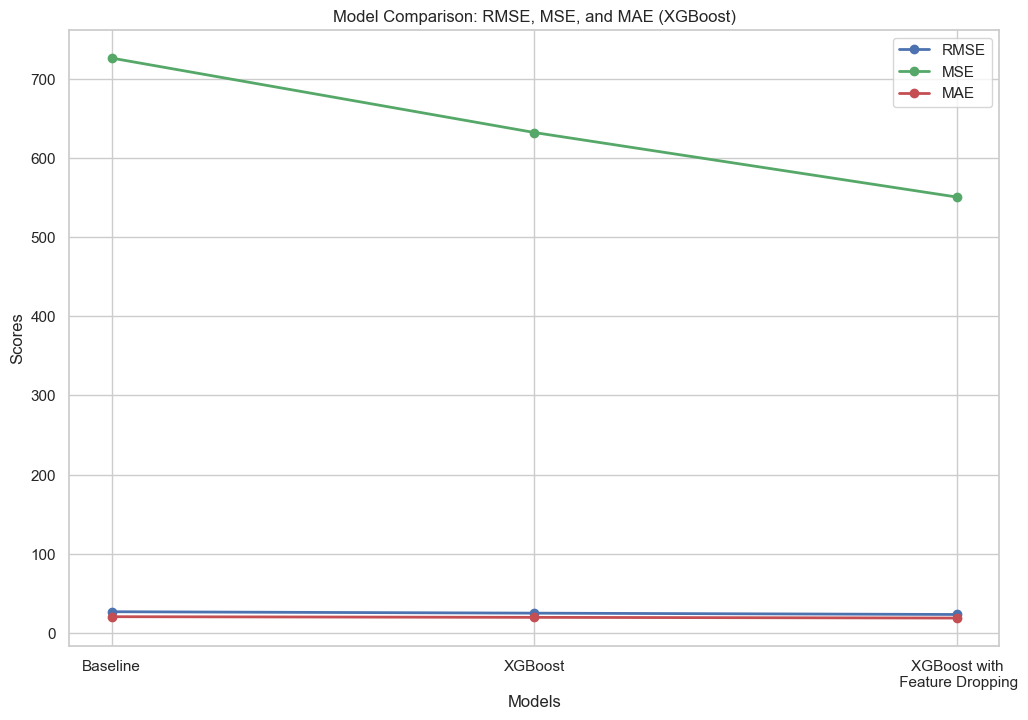

In [86]:
# Metrics for XGBoost
xgb_rmse = xgb_test_rmse
xgb_mse = xgb_test_mse
xgb_mae = xgb_test_mae

# Metrics for XGBoost with Feature Dropping
fxgb_rmse = fxgb_test_rmse
fxgb_mse = fxgb_test_mse
fxgb_mae = fxgb_test_mae

# Prepare data for plotting
models = ['Baseline', 'XGBoost', 'XGBoost with\n Feature Dropping']
rmse_values = [baseline_rmse, xgb_rmse, fxgb_rmse]
mse_values = [baseline_mse, xgb_mse, fxgb_mse]
mae_values = [baseline_mae, xgb_mae, fxgb_mae]

# Plot the scores
plt.figure(figsize=(12, 8))

# Plot RMSE
plt.plot(models, rmse_values, marker='o', label='RMSE', linestyle='-', color='b', linewidth=2)

# Plot MSE
plt.plot(models, mse_values, marker='o', label='MSE', linestyle='-', color='g', linewidth=2)

# Plot MAE
plt.plot(models, mae_values, marker='o', label='MAE', linestyle='-', color='r', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: RMSE, MSE, and MAE (XGBoost)')
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

# LightGBM

In [87]:
import lightgbm as lgb

# Train LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

lgb_model.fit(X_train_Oversampled, y_train_oversampled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 15300, number of used features: 13
[LightGBM] [Info] Start training from score 50.500000


LGBMRegressor(random_state=42)

In [88]:
#Performing cross-validation on the training set only
lgb_cv_scores = cross_val_score(lgb_model, X_train_Oversampled, y_train_oversampled, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)

lgb_cv_mse = lgb_cv_scores
lgb_cv_mae = cross_val_score(lgb_model, X_train_Oversampled, y_train_oversampled, cv=kf, scoring='neg_mean_absolute_error',n_jobs=-1)



lgb_cv_rmse = np.sqrt(-lgb_cv_scores)  # Convert negative MSE to RMSE
lgb_cv_mse = lgb_cv_mse
lgb_cv_mae = -lgb_cv_mae


# Print RMSE, MSE, and MAE for each fold
print("Cross-Validation RMSE for each fold:", lgb_cv_rmse)
print("Cross-Validation MSE for each fold:", -lgb_cv_mse)  # MSE is negative, so negate it
print("Cross-Validation MAE for each fold:", lgb_cv_mae)

# Calculate mean RMSE, MSE, and MAE across all folds
lgb_cv_mean_rmse = lgb_cv_rmse.mean()
lgb_cv_mean_mse = -lgb_cv_mse.mean()  # Negate to get positive MSE
lgb_cv_mean_mae = lgb_cv_mae.mean()

# Displaying the mean RMSE, MSE, and MAE
print(f"Mean RMSE: {lgb_cv_mean_rmse:.2f}")
print(f"Mean MSE: {lgb_cv_mean_mse:.2f}")
print(f"Mean MAE: {lgb_cv_mean_mae:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 13770, number of used features: 13
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 13770, number of used features: 13
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Start training from score 50.499201
[LightGBM] [Info] Number of data points in the train set: 13770, number of used features: 13
[LightGBM] [Inf

In [89]:

# Make predictions
lgb_train_pred = lgb_model.predict(X_train_Oversampled)
lgb_test_pred = lgb_model.predict(X_test)

# Calculate metrics
lgb_train_rmse = np.sqrt(mean_squared_error(y_train_oversampled, lgb_train_pred))
lgb_test_rmse = np.sqrt(mean_squared_error(y_test, lgb_test_pred))

lgb_train_mse = (mean_squared_error(y_train_oversampled, lgb_train_pred))
lgb_test_mse =  (mean_squared_error(y_test, lgb_test_pred))

lgb_train_mae = (mean_absolute_error(y_train_oversampled, lgb_train_pred))
lgb_test_mae =  (mean_absolute_error(y_test, lgb_test_pred))

lgb_improvement = ((lgb_test_rmse - baseline_rmse) / lgb_test_rmse) * 100

print("Random Forest Model Results:")
print(f"Train RMSE: {lgb_train_rmse:.2f}")
print(f"Test RMSE: {lgb_test_rmse:.2f}")
print(f"Train MSE: {lgb_train_mse:.2f}")
print(f"Test MSE: {lgb_test_mse:.2f}")
print(f"Train MAE: {lgb_train_mae:.2f}")
print(f"Test MAE: {lgb_test_mae:.2f}")

print(f"Improvement over baseline: {lgb_improvement:.1f}%")

Random Forest Model Results:
Train RMSE: 16.63
Test RMSE: 24.10
Train MSE: 276.71
Test MSE: 580.72
Train MAE: 13.25
Test MAE: 19.43
Improvement over baseline: -11.8%


In [90]:
lgb_model.fit(X_train_balanced, y_train_oversampled)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2309
[LightGBM] [Info] Number of data points in the train set: 15300, number of used features: 11
[LightGBM] [Info] Start training from score 50.500000


LGBMRegressor(random_state=42)

In [91]:
#Performing cross-validation on the training set only
flgb_cv_scores = cross_val_score(lgb_model, X_train_balanced, y_train_oversampled, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)

flgb_cv_mse = flgb_cv_scores
flgb_cv_mae = cross_val_score(lgb_model, X_train_Oversampled, y_train_oversampled, cv=kf, scoring='neg_mean_absolute_error',n_jobs=-1)



flgb_cv_rmse = np.sqrt(-flgb_cv_scores)  # Convert negative MSE to RMSE
flgb_cv_mse = flgb_cv_mse
flgb_cv_mae = -flgb_cv_mae


# Print RMSE, MSE, and MAE for each fold
print("Cross-Validation RMSE for each fold:", flgb_cv_rmse)
print("Cross-Validation MSE for each fold:", -flgb_cv_mse)  # MSE is negative, so negate it
print("Cross-Validation MAE for each fold:", flgb_cv_mae)

# Calculate mean RMSE, MSE, and MAE across all folds
flgb_cv_mean_rmse = flgb_cv_rmse.mean()
flgb_cv_mean_mse = -flgb_cv_mse.mean()  # Negate to get positive MSE
flgb_cv_mean_mae = flgb_cv_mae.mean()

# Displaying the mean RMSE, MSE, and MAE
print(f"Mean RMSE: {flgb_cv_mean_rmse:.2f}")
print(f"Mean MSE: {flgb_cv_mean_mse:.2f}")
print(f"Mean MAE: {flgb_cv_mean_mae:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2309
[LightGBM] [Info] Number of data points in the train set: 13770, number of used features: 11
[LightGBM] [Info] Start training from score 50.531227
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2309
[LightGBM] [Info] Number of data points in the train set: 13770, number of used features: 11
[LightGBM] [Info] Start training from score 50.538998
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2309
[LightGBM] [Info] Number of data points in the train set: 13770, number of used features: 11
[LightGBM] [Info] Start t

In [92]:

# Make predictions
flgb_train_pred = lgb_model.predict(X_train_balanced)
flgb_test_pred = lgb_model.predict(X_test_balanced)

# Calculate metrics
flgb_train_rmse = np.sqrt(mean_squared_error(y_train_oversampled, flgb_train_pred))
flgb_test_rmse = np.sqrt(mean_squared_error(y_test, flgb_test_pred))

flgb_train_mse = (mean_squared_error(y_train_oversampled, flgb_train_pred))
flgb_test_mse =  (mean_squared_error(y_test, flgb_test_pred))

flgb_train_mae = (mean_absolute_error(y_train_oversampled, flgb_train_pred))
flgb_test_mae =  (mean_absolute_error(y_test, flgb_test_pred))

flgb_improvement = ((flgb_test_rmse - baseline_rmse) / flgb_test_rmse) * 100

print("lgboost Model Results:")
print(f"Train RMSE: {flgb_train_rmse:.2f}")
print(f"Test RMSE: {flgb_test_rmse:.2f}")
print(f"Train MSE: {flgb_train_mse:.2f}")
print(f"Test MSE: {flgb_test_mse:.2f}")
print(f"Train MAE: {flgb_train_mae:.2f}")
print(f"Test MAE: {flgb_test_mae:.2f}")

print(f"Improvement over baseline: {flgb_improvement:.1f}%")

lgboost Model Results:
Train RMSE: 17.15
Test RMSE: 24.44
Train MSE: 294.25
Test MSE: 597.11
Train MAE: 13.79
Test MAE: 19.72
Improvement over baseline: -10.3%


In [93]:
#Hyper-tuning 

In [94]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
param_grid = {
    'n_estimators': [100, 200, 300],  # number of trees
    'max_depth': [3, 5, 7],            # depth of each tree
    'learning_rate': [0.01, 0.1, 0.2], # step size shrinking
    'subsample': [0.8, 0.9, 1.0],      # fraction of samples used per tree
    'colsample_bytree': [0.8, 0.9, 1.0] # fraction of features used per tree
}
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')  # specify regression task

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_Oversampled, y_train_oversampled)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

y_pred = best_model.predict(X_train_Oversampled)

# Evaluate the model
mse = mean_squared_error(y_train_oversampled, y_pred)
print(f"Mean Squared Error: {mse}")


Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error: 39.611072029351156


In [95]:
import lightgbm as lgb

# Train LightGBM
lgb_model = lgb.LGBMRegressor(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 7, n_estimators= 300, subsample= 0.8, force_col_wise= True)

lgb_model.fit(X_train_Oversampled, y_train_oversampled)

[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 15300, number of used features: 13
[LightGBM] [Info] Start training from score 50.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(force_col_wise=True, max_depth=7, n_estimators=300, subsample=0.8)

In [96]:
#Performing cross-validation on the training set only
lgb_cv_scores = cross_val_score(lgb_model, X_train_Oversampled, y_train_oversampled, cv=kf, scoring='neg_mean_squared_error',n_jobs=-1)

lgb_cv_mse = lgb_cv_scores
lgb_cv_mae = cross_val_score(lgb_model, X_train_Oversampled, y_train_oversampled, cv=kf, scoring='neg_mean_absolute_error',n_jobs=-1)



lgb_cv_rmse = np.sqrt(-lgb_cv_scores)  # Convert negative MSE to RMSE
lgb_cv_mse = lgb_cv_mse
lgb_cv_mae = -lgb_cv_mae


# Print RMSE, MSE, and MAE for each fold
print("Cross-Validation RMSE for each fold:", lgb_cv_rmse)
print("Cross-Validation MSE for each fold:", -lgb_cv_mse)  # MSE is negative, so negate it
print("Cross-Validation MAE for each fold:", lgb_cv_mae)

# Calculate mean RMSE, MSE, and MAE across all folds
lgb_cv_mean_rmse = lgb_cv_rmse.mean()
lgb_cv_mean_mse = -lgb_cv_mse.mean()  # Negate to get positive MSE
lgb_cv_mean_mae = lgb_cv_mae.mean()

# Displaying the mean RMSE, MSE, and MAE
print(f"Mean RMSE: {lgb_cv_mean_rmse:.2f}")
print(f"Mean MSE: {lgb_cv_mean_mse:.2f}")
print(f"Mean MAE: {lgb_cv_mean_mae:.2f}")

[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 13770, number of used features: 13
[LightGBM] [Info] Start training from score 50.531227
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 13770, number of used features: 13
[LightGBM] [Info] Start training from score 50.538998
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 13770, number of used features: 13
[LightGBM] [Info] Start training from score 50.499201
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 13770, number of used features: 13
[LightGBM] [Info] Start training from score 50.422513
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 13770, number of used features: 13
[LightGBM] [Info] Start training from score 50.480174
[LightGBM] [Info] Total Bins 2819
[LightGBM] [Info] Number of data points in the train set: 137

In [97]:

# Make predictions with updated parameters
lgb_train_pred = lgb_model.predict(X_train_Oversampled)
lgb_test_pred = lgb_model.predict(X_test)

# Calculate metrics
lgb_train_rmse = np.sqrt(mean_squared_error(y_train_oversampled, lgb_train_pred))
lgb_test_rmse = np.sqrt(mean_squared_error(y_test, lgb_test_pred))

lgb_train_mse = (mean_squared_error(y_train_oversampled, lgb_train_pred))
lgb_test_mse =  (mean_squared_error(y_test, lgb_test_pred))

lgb_train_mae = (mean_absolute_error(y_train_oversampled, lgb_train_pred))
lgb_test_mae =  (mean_absolute_error(y_test, lgb_test_pred))

lgb_improvement = ((lgb_test_rmse - baseline_rmse) / lgb_test_rmse) * 100

print("Random Forest Model Results:")
print(f"Train RMSE: {lgb_train_rmse:.2f}")
print(f"Test RMSE: {lgb_test_rmse:.2f}")
print(f"Train MSE: {lgb_train_mse:.2f}")
print(f"Test MSE: {lgb_test_mse:.2f}")
print(f"Train MAE: {lgb_train_mae:.2f}")
print(f"Test MAE: {lgb_test_mae:.2f}")

print(f"Improvement over baseline: {lgb_improvement:.1f}%")

Random Forest Model Results:
Train RMSE: 12.16
Test RMSE: 24.33
Train MSE: 147.79
Test MSE: 592.17
Train MAE: 8.98
Test MAE: 19.43
Improvement over baseline: -10.7%


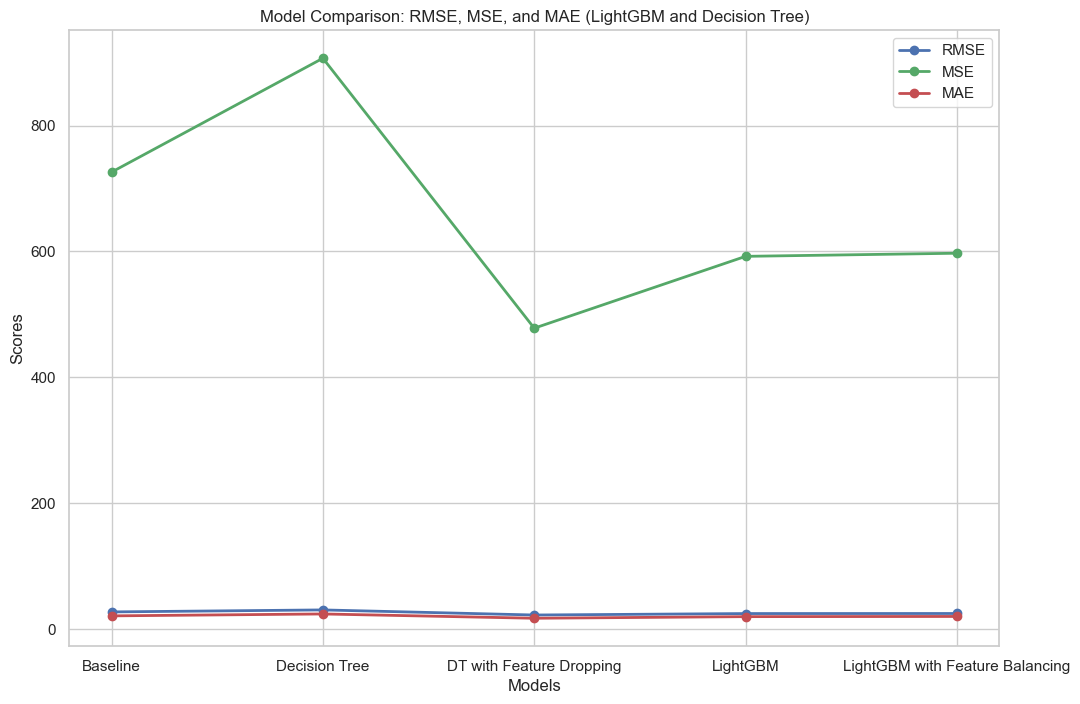

In [98]:
# Metrics for LightGBM
lgb_rmse = lgb_test_rmse
lgb_mse = lgb_test_mse
lgb_mae = lgb_test_mae

# Metrics for LightGBM (Feature Balancing)
lgb_fb_rmse = flgb_test_rmse
lgb_fb_mse = flgb_test_mse
lgb_fb_mae = flgb_test_mae

# Prepare data for plotting
models = ['Baseline', 'Decision Tree', 'DT with Feature Dropping', 'LightGBM', 'LightGBM with Feature Balancing']
rmse_values = [baseline_rmse, dt_rmse, dt_fd_rmse, lgb_rmse, lgb_fb_rmse]
mse_values = [baseline_mse, dt_mse, dt_fd_mse, lgb_mse, lgb_fb_mse]
mae_values = [baseline_mae, dt_mae, dt_fd_mae, lgb_mae, lgb_fb_mae]

# Plot the scores
plt.figure(figsize=(12, 8))

# Plot RMSE
plt.plot(models, rmse_values, marker='o', label='RMSE', linestyle='-', color='b', linewidth=2)

# Plot MSE
plt.plot(models, mse_values, marker='o', label='MSE', linestyle='-', color='g', linewidth=2)

# Plot MAE
plt.plot(models, mae_values, marker='o', label='MAE', linestyle='-', color='r', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: RMSE, MSE, and MAE (LightGBM and Decision Tree)')
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


# Comparision of Models

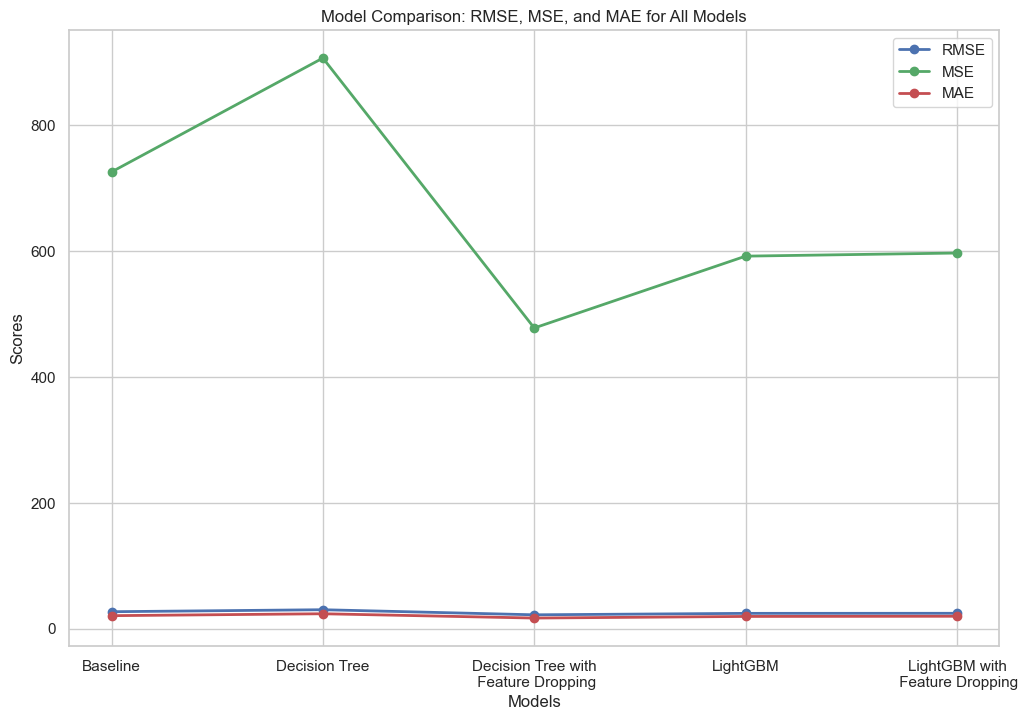

In [99]:
# Metrics for Decision Tree
dt_rmse = dt_test_rmse
dt_mse = dt_test_mse
dt_mae = dt_test_mae

# Metrics for Decision Tree (Feature Dropping)
dt_fd_rmse = fdt_cv_mean_rmse
dt_fd_mse = fdt_cv_mean_mse
dt_fd_mae = fdt_cv_mean_mae

# Metrics for LightGBM
lgb_rmse = lgb_test_rmse
lgb_mse = lgb_test_mse
lgb_mae = lgb_test_mae

# Metrics for LightGBM (Feature Dropping)
flgb_rmse = flgb_test_rmse
flgb_mse = flgb_test_mse
flgb_mae = flgb_test_mae

# Metrics for XGBoost
xgb_rmse = xgb_test_rmse
xgb_mse = xgb_test_mse
xgb_mae = xgb_test_mae

# Metrics for XGBoost (Feature Dropping)
# fxgb_rmse = fxgb_test_rmse
# fxgb_mse = fxgb_test_mse
# fxgb_mae = fxgb_test_mae

# Prepare data for plotting
models = ['Baseline', 'Decision Tree', 'Decision Tree with\n Feature Dropping', 'LightGBM', 'LightGBM with\n Feature Dropping'] # , 'XGBoost', 'XGBoost with Feature Dropping'
rmse_values = [baseline_rmse, dt_rmse, dt_fd_rmse, lgb_rmse, flgb_rmse] # , xgb_rmse, fxgb_rmse
mse_values = [baseline_mse, dt_mse, dt_fd_mse, lgb_mse, flgb_mse] # , xgb_mse, fxgb_mse
mae_values = [baseline_mae, dt_mae, dt_fd_mae, lgb_mae, flgb_mae] # , xgb_mae, fxgb_mae

# Plot the scores
plt.figure(figsize=(12, 8))

# Plot RMSE
plt.plot(models, rmse_values, marker='o', label='RMSE', linestyle='-', color='b', linewidth=2)

# Plot MSE
plt.plot(models, mse_values, marker='o', label='MSE', linestyle='-', color='g', linewidth=2)

# Plot MAE
plt.plot(models, mae_values, marker='o', label='MAE', linestyle='-', color='r', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: RMSE, MSE, and MAE for All Models')
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


# Model Comparison

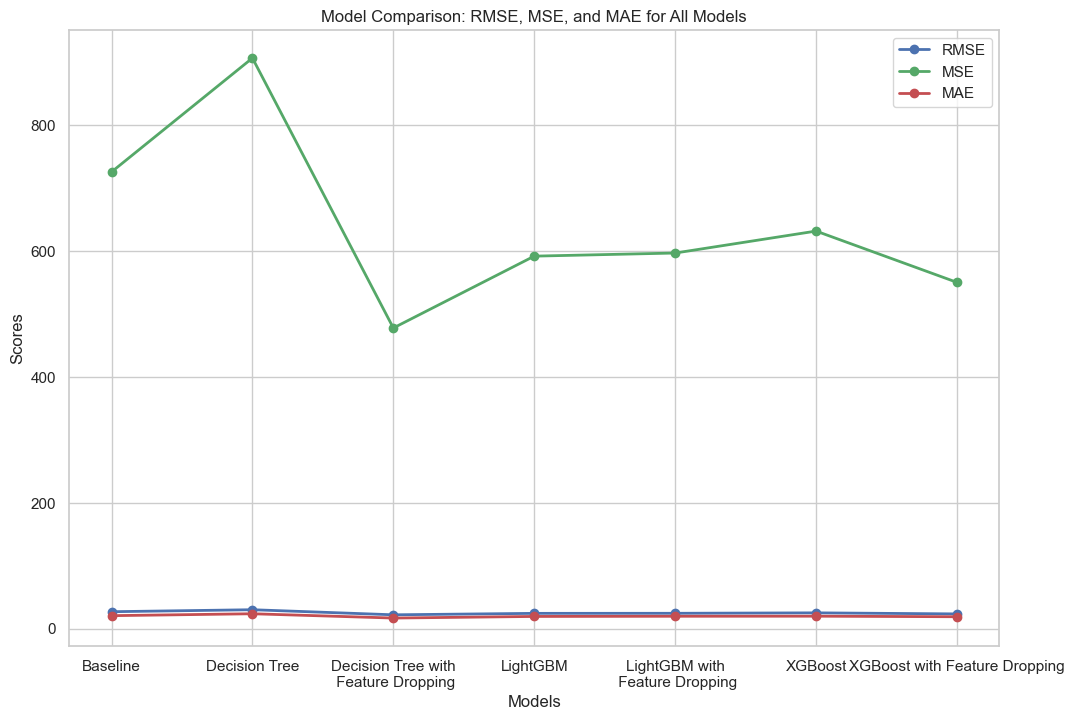

In [101]:
# Metrics for Decision Tree
dt_rmse = dt_test_rmse
dt_mse = dt_test_mse
dt_mae = dt_test_mae

# Metrics for Decision Tree (Feature Dropping)
dt_fd_rmse = fdt_cv_mean_rmse
dt_fd_mse = fdt_cv_mean_mse
dt_fd_mae = fdt_cv_mean_mae

# Metrics for LightGBM
lgb_rmse = lgb_test_rmse
lgb_mse = lgb_test_mse
lgb_mae = lgb_test_mae

# Metrics for LightGBM (Feature Dropping)
flgb_rmse = flgb_test_rmse
flgb_mse = flgb_test_mse
flgb_mae = flgb_test_mae

# Metrics for XGBoost
xgb_rmse = xgb_test_rmse
xgb_mse = xgb_test_mse
xgb_mae = xgb_test_mae

# Metrics for XGBoost (Feature Dropping)
# fxgb_rmse = fxgb_test_rmse
# fxgb_mse = fxgb_test_mse
# fxgb_mae = fxgb_test_mae

# Prepare data for plotting
models = ['Baseline', 'Decision Tree', 'Decision Tree with\n Feature Dropping', 'LightGBM', 'LightGBM with\n Feature Dropping', 'XGBoost', 'XGBoost with Feature Dropping'] # 
rmse_values = [baseline_rmse, dt_rmse, dt_fd_rmse, lgb_rmse, flgb_rmse, xgb_rmse, fxgb_rmse] # 
mse_values = [baseline_mse, dt_mse, dt_fd_mse, lgb_mse, flgb_mse, xgb_mse, fxgb_mse] # 
mae_values = [baseline_mae, dt_mae, dt_fd_mae, lgb_mae, flgb_mae, xgb_mae, fxgb_mae] # 

# Plot the scores
plt.figure(figsize=(12, 8))

# Plot RMSE
plt.plot(models, rmse_values, marker='o', label='RMSE', linestyle='-', color='b', linewidth=2)

# Plot MSE
plt.plot(models, mse_values, marker='o', label='MSE', linestyle='-', color='g', linewidth=2)

# Plot MAE
plt.plot(models, mae_values, marker='o', label='MAE', linestyle='-', color='r', linewidth=2)

# Add labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: RMSE, MSE, and MAE for All Models')
plt.legend()

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()